<a href="https://colab.research.google.com/github/Virendra-sitaram/express/blob/master/21st_june25_QA_Model_Evaluation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1: Installing Required Packages for the **Project** **bold text**

In [1]:
# Install required packages
!pip install transformers torch pandas numpy matplotlib seaborn nltk gensim scikit-learn sentence-transformers rouge datasets tqdm pytextrank spacy
!python -m spacy download en_core_web_sm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.8/12.8 MB 58.9 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Section 2: Importing Libraries and Setting Up the Environment**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import torch
import os
import re
import random
from tqdm.notebook import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

# For NLP processing
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import spacy

# For models
from transformers import (
    DistilBertForQuestionAnswering,
    RobertaForQuestionAnswering,
    BartForQuestionAnswering,
    AutoModelForQuestionAnswering,
    AutoTokenizer,
    pipeline,
    T5ForConditionalGeneration
)
from sentence_transformers import SentenceTransformer
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# For evaluation
from sklearn.metrics.pairwise import cosine_similarity
from nltk.metrics import jaccard_distance
from sklearn.metrics import f1_score
from rouge import Rouge

# For data collection
from datasets import load_dataset

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Check for GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using device: cpu


In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Create project directory in Google Drive
!mkdir -p /content/drive/MyDrive/QA_Evaluation_Project
project_dir = "/content/drive/MyDrive/QA_Evaluation_Project"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Section 3: Defining Domains and Keywords for Categorization**

In [6]:
# Define our domains
domains = [
    "sports",
    "locations",
    "persons",
    "medical_conditions",
    "agriculture_products",
    "educational_institutions"
]

# Define keywords for each domain to help with categorization
domain_keywords = {
    "sports": ["sport", "athlete", "team", "championship", "tournament", "game", "player",
               "coach", "stadium", "basketball", "football", "soccer", "tennis", "olympics",
               "baseball", "golf", "hockey", "match", "score", "victory", "defeat", "league",
               "fitness", "competition", "medal", "record", "race", "training", "swim"],

    "locations": [   "island", "mountain", "river", "ocean", "landmark", "valley", "forest", "desert", "beach", "lake", "town", "village", "capital", "state", "province", "geography", "coast", "climate", "population", "territory", "border", "landscape", "park", "peninsula", "bay"],
    "persons": ["person", "individual", "leader", "artist", "scientist", "politician", "actor",
           "author", "inventor", "musician", "writer", "director", "president", "king",
           "queen", "celebrity", "philosopher", "painter", "composer", "performer", "athlete",
           "entrepreneur", "pioneer", "activist", "scholar", "journalist", "soldier", "explorer"],

"medical_conditions": ["disease", "condition", "symptom", "treatment", "patient", "doctor",
                     "hospital", "medication", "therapy", "diagnosis", "surgery", "cancer",
                     "diabetes", "infection", "disorder", "illness", "syndrome", "physician",
                     "clinic", "prescription", "recovery", "health", "chronic", "acute",
                     "medical", "clinical", "pathology", "immunity", "vaccine", "pandemic"],

"agriculture_products": ["crop", "farm", "harvest", "soil", "plant", "agriculture", "farmer",
                       "cultivation", "livestock", "grain", "fruit", "vegetable", "seed",
                       "irrigation", "fertilizer", "organic", "yield", "dairy", "cattle",
                       "poultry", "wheat", "corn", "rice", "cotton", "sustainable", "pesticide",
                       "greenhouse", "plantation", "orchard", "breeding"],

"educational_institutions": ["university", "college", "school", "education", "student",
                           "professor", "campus", "degree", "academic", "faculty", "classroom",
                           "curriculum", "lecture", "research", "scholarship", "diploma",
                           "library", "laboratory", "thesis", "dissertation", "graduate",
                           "undergraduate", "discipline", "department", "institute", "academy",
                           "educator", "alumni", "semester", "tuition"]
    }

** Section 4: Collect Paragraphs from Various Sources**

In [13]:
pip install --upgrade datasets


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.5/491.5 kB 9.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 193.6/193.6 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [2]:
# Make sure to upgrade the datasets library first (if needed)
!pip install -q --upgrade datasets

from datasets import load_dataset

# Function to categorize paragraphs into domains based on keywords
def categorize_paragraph(paragraph):
    """Categorize a paragraph into one of the predefined domains based on keyword matching"""
    paragraph_lower = paragraph.lower()

    # Example domain_keywords
    domain_keywords = {
        "sports": ["game", "score", "team", "player", "tournament"],
        "locations": ["city", "river", "mountain", "island", "country"],
        "persons": ["he", "she", "scientist", "leader", "actor"],
        "medical_conditions": ["disease", "symptom", "health", "treatment", "condition"],
        "agriculture_products": ["crop", "farming", "agriculture", "harvest", "rice"],
        "educational_institutions": ["university", "college", "school", "campus", "student"]
    }

    # Count keyword matches for each domain
    domain_scores = {}
    for domain, keywords in domain_keywords.items():
        score = sum(1 for keyword in keywords if keyword in paragraph_lower)
        domain_scores[domain] = score

    # Find domain with highest keyword match score
    best_domain = max(domain_scores.items(), key=lambda x: x[1])
    return best_domain[0] if best_domain[1] > 0 else None


# Load some datasets for paragraphs (this is now correct and safe)
print("Loading SQuAD dataset...")
squad_dataset = load_dataset("squad")

print("Loading RACE dataset...")
race_dataset = load_dataset("race", "all")

print("Loading CNN/DailyMail dataset...")
cnn_dataset = load_dataset("ccdv/cnn_dailymail", "3.0.0")

print("Loading TriviaQA dataset...")
trivia_dataset = load_dataset("trivia_qa", "unfiltered")

print("Datasets loaded successfully!")


Loading SQuAD dataset...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Loading RACE dataset...


README.md:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.08M [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/37.4M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/2.05M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4934 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/87866 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4887 [00:00<?, ? examples/s]

Loading CNN/DailyMail dataset...


README.md:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

cnn_dailymail.py:   0%|          | 0.00/9.27k [00:00<?, ?B/s]

cnn_stories.tgz:   0%|          | 0.00/159M [00:00<?, ?B/s]

dailymail_stories.tgz:   0%|          | 0.00/376M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Loading TriviaQA dataset...


README.md:   0%|          | 0.00/26.7k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/47 [00:00<?, ?it/s]

train-00000-of-00047.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

train-00001-of-00047.parquet:   0%|          | 0.00/279M [00:00<?, ?B/s]

train-00002-of-00047.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

train-00003-of-00047.parquet:   0%|          | 0.00/243M [00:00<?, ?B/s]

train-00004-of-00047.parquet:   0%|          | 0.00/224M [00:00<?, ?B/s]

train-00005-of-00047.parquet:   0%|          | 0.00/231M [00:00<?, ?B/s]

train-00006-of-00047.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00007-of-00047.parquet:   0%|          | 0.00/245M [00:00<?, ?B/s]

train-00008-of-00047.parquet:   0%|          | 0.00/244M [00:00<?, ?B/s]

train-00009-of-00047.parquet:   0%|          | 0.00/244M [00:00<?, ?B/s]

train-00010-of-00047.parquet:   0%|          | 0.00/410M [00:00<?, ?B/s]

train-00011-of-00047.parquet:   0%|          | 0.00/386M [00:00<?, ?B/s]

train-00012-of-00047.parquet:   0%|          | 0.00/367M [00:00<?, ?B/s]

train-00013-of-00047.parquet:   0%|          | 0.00/350M [00:00<?, ?B/s]

train-00014-of-00047.parquet:   0%|          | 0.00/310M [00:00<?, ?B/s]

train-00015-of-00047.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

train-00016-of-00047.parquet:   0%|          | 0.00/397M [00:00<?, ?B/s]

train-00017-of-00047.parquet:   0%|          | 0.00/372M [00:00<?, ?B/s]

train-00018-of-00047.parquet:   0%|          | 0.00/320M [00:00<?, ?B/s]

train-00019-of-00047.parquet:   0%|          | 0.00/351M [00:00<?, ?B/s]

train-00020-of-00047.parquet:   0%|          | 0.00/314M [00:00<?, ?B/s]

train-00021-of-00047.parquet:   0%|          | 0.00/270M [00:00<?, ?B/s]

train-00022-of-00047.parquet:   0%|          | 0.00/201M [00:00<?, ?B/s]

train-00023-of-00047.parquet:   0%|          | 0.00/244M [00:00<?, ?B/s]

train-00024-of-00047.parquet:   0%|          | 0.00/271M [00:00<?, ?B/s]

train-00025-of-00047.parquet:   0%|          | 0.00/252M [00:00<?, ?B/s]

train-00026-of-00047.parquet:   0%|          | 0.00/278M [00:00<?, ?B/s]

train-00027-of-00047.parquet:   0%|          | 0.00/258M [00:00<?, ?B/s]

train-00028-of-00047.parquet:   0%|          | 0.00/252M [00:00<?, ?B/s]

train-00029-of-00047.parquet:   0%|          | 0.00/261M [00:00<?, ?B/s]

train-00030-of-00047.parquet:   0%|          | 0.00/273M [00:00<?, ?B/s]

train-00031-of-00047.parquet:   0%|          | 0.00/264M [00:00<?, ?B/s]

train-00032-of-00047.parquet:   0%|          | 0.00/268M [00:00<?, ?B/s]

train-00033-of-00047.parquet:   0%|          | 0.00/269M [00:00<?, ?B/s]

train-00034-of-00047.parquet:   0%|          | 0.00/338M [00:00<?, ?B/s]

train-00035-of-00047.parquet:   0%|          | 0.00/350M [00:00<?, ?B/s]

train-00036-of-00047.parquet:   0%|          | 0.00/284M [00:00<?, ?B/s]

train-00037-of-00047.parquet:   0%|          | 0.00/268M [00:00<?, ?B/s]

train-00038-of-00047.parquet:   0%|          | 0.00/271M [00:00<?, ?B/s]

train-00039-of-00047.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00040-of-00047.parquet:   0%|          | 0.00/284M [00:00<?, ?B/s]

train-00041-of-00047.parquet:   0%|          | 0.00/251M [00:00<?, ?B/s]

train-00042-of-00047.parquet:   0%|          | 0.00/196M [00:00<?, ?B/s]

train-00043-of-00047.parquet:   0%|          | 0.00/198M [00:00<?, ?B/s]

train-00044-of-00047.parquet:   0%|          | 0.00/198M [00:00<?, ?B/s]

train-00045-of-00047.parquet:   0%|          | 0.00/349M [00:00<?, ?B/s]

train-00046-of-00047.parquet:   0%|          | 0.00/361M [00:00<?, ?B/s]

validation-00000-of-00007.parquet:   0%|          | 0.00/212M [00:00<?, ?B/s]

validation-00001-of-00007.parquet:   0%|          | 0.00/265M [00:00<?, ?B/s]

validation-00002-of-00007.parquet:   0%|          | 0.00/308M [00:00<?, ?B/s]

validation-00003-of-00007.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

validation-00004-of-00007.parquet:   0%|          | 0.00/234M [00:00<?, ?B/s]

validation-00005-of-00007.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00006-of-00007.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

test-00000-of-00006.parquet:   0%|          | 0.00/235M [00:00<?, ?B/s]

test-00001-of-00006.parquet:   0%|          | 0.00/316M [00:00<?, ?B/s]

test-00002-of-00006.parquet:   0%|          | 0.00/300M [00:00<?, ?B/s]

test-00003-of-00006.parquet:   0%|          | 0.00/266M [00:00<?, ?B/s]

test-00004-of-00006.parquet:   0%|          | 0.00/295M [00:00<?, ?B/s]

test-00005-of-00006.parquet:   0%|          | 0.00/251M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87622 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11313 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10832 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/36 [00:00<?, ?it/s]

Datasets loaded successfully!


In [3]:
### 3.2: Collect Paragraphs from Various Sources

# Function to categorize paragraphs into domains based on keywords
def categorize_paragraph(paragraph):
    """Categorize a paragraph into one of the predefined domains based on keyword matching"""
    paragraph_lower = paragraph.lower()

    # Count keyword matches for each domain
    domain_scores = {}
    for domain, keywords in domain_keywords.items():
        score = sum(1 for keyword in keywords if keyword in paragraph_lower)
        domain_scores[domain] = score

    # Find domain with highest keyword match score
    best_domain = max(domain_scores.items(), key=lambda x: x[1])

    # Only return domain if it has at least one keyword match
    if best_domain[1] > 0:
        return best_domain[0]
    else:
        return None

# Load some datasets for paragraphs
print("Loading SQuAD dataset...")
squad_dataset = load_dataset("squad")

print("Loading RACE dataset...")
race_dataset = load_dataset("race", "all")

print("Loading some news articles...")
cnn_dataset = load_dataset("ccdv/cnn_dailymail", "3.0.0")

print("Loading extractive QA datasets...")
qa_datasets = load_dataset("trivia_qa", "unfiltered")

Loading SQuAD dataset...
Loading RACE dataset...
Loading some news articles...
Loading extractive QA datasets...


Resolving data files:   0%|          | 0/26 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/47 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/36 [00:00<?, ?it/s]

**section :5 Function Explanation: collect_paragraphs() ‚Äì Collecting Domain-Based Paragraphs from QA Datasets**

In [6]:
# ‚úÖ Install datasets if not already installed
# !pip install datasets tqdm

from datasets import load_dataset
from tqdm import tqdm

# ‚úÖ Step 1: Define target domains and keywords
domains = [
    "sports",
    "locations",
    "persons",
    "medical_conditions",
    "agriculture_products",
    "educational_institutions"
]

domain_keywords = {
    "sports": ["game", "tournament", "team", "match", "score", "player", "football", "basketball", "sport"],
    "locations": ["city", "country", "village", "state", "region", "place", "location"],
    "persons": ["person", "scientist", "leader", "politician", "actor", "singer", "name", "biography"],
    "medical_conditions": ["disease", "illness", "symptom", "treatment", "doctor", "hospital", "health"],
    "agriculture_products": ["crop", "farming", "harvest", "wheat", "rice", "produce", "farmer"],
    "educational_institutions": ["school", "college", "university", "education", "student", "teacher", "academic"]
}

# ‚úÖ Step 2: Define categorization function
def categorize_paragraph(paragraph):
    paragraph_lower = paragraph.lower()
    domain_scores = {}
    for domain, keywords in domain_keywords.items():
        score = sum(1 for keyword in keywords if keyword in paragraph_lower)
        domain_scores[domain] = score
    best_domain = max(domain_scores.items(), key=lambda x: x[1])
    return best_domain[0] if best_domain[1] > 0 else None

# ‚úÖ Step 3: Load datasets
print("Loading datasets...")
squad_dataset = load_dataset("squad")
race_dataset = load_dataset("race", "all")
cnn_dataset = load_dataset("ccdv/cnn_dailymail", "3.0.0")

# ‚úÖ Step 4: Function to collect paragraphs
def collect_paragraphs(max_per_domain=50):
    paragraphs_count = {domain: 0 for domain in domains}
    domain_paragraphs = {domain: [] for domain in domains}
    all_domains_complete = False

    # Function to update domain storage
    def try_add_paragraph(text):
        nonlocal all_domains_complete
        if len(text.split()) < 50 or len(text.split()) > 300:
            return
        domain = categorize_paragraph(text)
        if domain and paragraphs_count[domain] < max_per_domain:
            if text not in domain_paragraphs[domain]:
                domain_paragraphs[domain].append(text)
                paragraphs_count[domain] += 1
                if all(count >= max_per_domain for count in paragraphs_count.values()):
                    all_domains_complete = True

    print("Processing SQuAD...")
    for item in tqdm(squad_dataset["train"]):
        if all_domains_complete: break
        try_add_paragraph(item["context"])

    print("Processing RACE...")
    for item in tqdm(race_dataset["train"]):
        if all_domains_complete: break
        for para in item["article"].split("\n"):
            try_add_paragraph(para)
            if all_domains_complete: break

    print("Processing CNN News...")
    for item in tqdm(cnn_dataset["train"].select(range(1000))):
        if all_domains_complete: break
        for para in item["article"].split("\n"):
            try_add_paragraph(para)
            if all_domains_complete: break

    # ‚úÖ Print summary
    for domain in domains:
        print(f"{domain}: {len(domain_paragraphs[domain])} paragraphs")

    return paragraphs_count, domain_paragraphs

# ‚úÖ Run the function
paragraphs_count, domain_paragraphs = collect_paragraphs(max_per_domain=50)


Loading datasets...
Processing SQuAD...


 12%|‚ñà‚ñè        | 10696/87599 [00:02<00:17, 4352.11it/s]


Processing RACE...


  0%|          | 0/87866 [00:00<?, ?it/s]


Processing CNN News...


  0%|          | 0/1000 [00:00<?, ?it/s]

sports: 50 paragraphs
locations: 50 paragraphs
persons: 50 paragraphs
medical_conditions: 50 paragraphs
agriculture_products: 50 paragraphs
educational_institutions: 50 paragraphs


 **section 6: Enhancing and Saving Domain-Based Paragraph Dataset**

In [7]:
import random
from nltk.tokenize import sent_tokenize
import pandas as pd
import os

# Make sure project_dir is defined
project_dir = "./data"  # or any path you prefer
os.makedirs(project_dir, exist_ok=True)

# Custom paragraphs for each domain

custom_paragraphs = {
    "sports": [
        "The Olympic Games are an international sports festival that began in ancient Greece. The original Olympic Games were held in Olympia, Greece, from the 8th century BC to the 4th century AD. However, the modern Olympic Games began in 1896 when Baron Pierre de Coubertin founded the International Olympic Committee.",
        "Basketball was invented by Dr. James Naismith in December 1891 in Springfield, Massachusetts. He created the game as an indoor activity for his students during the winter months. The NBA was founded in 1946 and is now one of the most popular sports leagues worldwide."
    ],
    "locations": [
        "Venice, known as the 'City of Canals,' is built on 118 small islands in the Venetian Lagoon in northeast Italy. It is famous for its architecture and gondolas.",
        "The Grand Canyon is a massive canyon carved by the Colorado River in Arizona, United States. It is known for its visually overwhelming size and colorful rock layers."
    ],
    "persons": [
        "Albert Einstein was a theoretical physicist best known for developing the theory of relativity, one of the two pillars of modern physics. His work had a major impact on the development of atomic energy.",
        "Mother Teresa, known for her humanitarian work, was a Catholic nun who devoted her life to caring for the sick and poor in India. She founded the Missionaries of Charity and was awarded the Nobel Peace Prize in 1979."
    ],
    "medical_conditions": [
        "Diabetes is a chronic condition that affects the way the body processes blood sugar. It can lead to complications such as heart disease, kidney failure, and vision loss if not managed properly.",
        "Asthma is a respiratory condition marked by spasms in the bronchi of the lungs, causing difficulty in breathing. It is often triggered by allergies or exercise and managed using inhalers."
    ],
    "agriculture_products": [
        "Wheat is one of the most widely cultivated cereal grains in the world. It is a staple food used to make bread, pasta, and many other products. Major producers include China, India, and Russia.",
        "Rice is the primary food source for more than half of the world's population. It is grown mostly in Asian countries and requires a large amount of water for cultivation."
    ],
    "educational_institutions": [
        "Harvard University, located in Cambridge, Massachusetts, is one of the oldest and most prestigious universities in the world. It is known for its law, business, and medical schools.",
        "The Indian Institute of Technology (IIT) is a group of autonomous public technical universities in India. They are among the top engineering institutions in the country, known for academic excellence and competitive admissions."
    ],
}

# Add custom paragraphs where needed
for domain, paragraphs_needed in paragraphs_count.items():
    needed = 50 - len(domain_paragraphs[domain])
    if needed > 0 and domain in custom_paragraphs:
        domain_paragraphs[domain].extend(custom_paragraphs[domain][:needed])

        # If still need more, generate some using given data
        still_needed = 50 - len(domain_paragraphs[domain])
        if still_needed > 0:
            for i in range(still_needed):
                # Create a synthetic paragraph by combining sentences from existing ones
                if len(domain_paragraphs[domain]) > 0:
                    sentences = []
                    for j in range(5):  # Use 5 sentences from random paragraphs
                        random_paragraph = random.choice(domain_paragraphs[domain])
                        para_sentences = sent_tokenize(random_paragraph)
                        if para_sentences:
                            sentences.append(random.choice(para_sentences))

                    if sentences:
                        synthetic_paragraph = " ".join(sentences)
                        domain_paragraphs[domain].append(synthetic_paragraph)

# Verify we have exactly 50 paragraphs per domain
for domain, paragraphs in domain_paragraphs.items():
    if len(paragraphs) > 50:
        # Trim excess paragraphs
        domain_paragraphs[domain] = paragraphs[:50]
    elif len(paragraphs) < 50:
        print(f"Warning: {domain} only has {len(paragraphs)} paragraphs")
    else:
        print(f"{domain}: {len(paragraphs)} paragraphs (complete)")

# Save the paragraphs
paragraph_data = []
for domain, paragraphs in domain_paragraphs.items():
    for idx, paragraph in enumerate(paragraphs):
        paragraph_data.append({
            "domain": domain,
            "paragraph_id": f"{domain}_{idx}",
            "paragraph": paragraph
        })

paragraph_df = pd.DataFrame(paragraph_data)
paragraph_df.to_csv(f"{project_dir}/paragraphs.csv", index=False)
print(f"Saved {len(paragraph_df)} paragraphs to {project_dir}/paragraphs.csv")

sports: 50 paragraphs (complete)
locations: 50 paragraphs (complete)
persons: 50 paragraphs (complete)
medical_conditions: 50 paragraphs (complete)
agriculture_products: 50 paragraphs (complete)
educational_institutions: 50 paragraphs (complete)
Saved 300 paragraphs to ./data/paragraphs.csv


In [8]:
import nltk
nltk.download('punkt')  # Ensure punkt is downloaded for sentence tokenization

# Now proceed with your existing code


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # Ensure punkt_tab is downloaded for sentence tokenization

# Now proceed with your existing code

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**section :7 Question-Answer Pair Generation from Domain-Based Paragraphs Using T5 and spaCy**

In [12]:
import random
import torch
import spacy
import pandas as pd
from tqdm import tqdm
from transformers import AutoTokenizer, T5ForConditionalGeneration
from nltk.tokenize import sent_tokenize

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load T5 model and tokenizer for question generation
print("Loading T5 model for question generation...")
t5_qg_tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
t5_qg_model = T5ForConditionalGeneration.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
t5_qg_model.to(device)

# Load spaCy with TextRank for answer candidate selection
print("Loading spaCy with TextRank...")
!python -m spacy download en_core_web_sm
import en_core_web_sm
nlp = en_core_web_sm.load()
try:
    from spacypagerank import textrank
    nlp.add_pipe("textrank", last=True)
except Exception as e:
    print("Warning: TextRank not loaded, fallback to sentence-based answer extraction.")

# Helper: Generate questions from a paragraph
def generate_questions_t5(paragraph, num_questions=5):
    questions = []
    answers = []

    # Extract sentences
    doc = nlp(paragraph)
    phrases = [sent.text for sent in doc.sents][:num_questions+5]

    # Fallback if not enough answers
    if len(phrases) < num_questions:
        try:
            phrases.extend([p.text for p in doc._.phrases[:num_questions+5-len(phrases)]])
        except:
            pass

    # Shuffle and select
    random.shuffle(phrases)
    potential_answers = phrases[:num_questions+2]

    for answer in potential_answers:
        if len(questions) >= num_questions:
            break

        input_text = f"answer: {answer} context: {paragraph}"
        if len(input_text) > 512:
            input_text = input_text[:512]

        inputs = t5_qg_tokenizer(input_text, return_tensors="pt", truncation=True, max_length=512).to(device)

        outputs = t5_qg_model.generate(
            inputs["input_ids"],
            max_length=64,
            num_beams=4,
            early_stopping=True
        )

        question = t5_qg_tokenizer.decode(outputs[0], skip_special_tokens=True)

        if question.endswith("?") and len(question.split()) > 3:
            questions.append(question)
            answers.append(answer)

    # If still fewer questions, create simple ones
    while len(questions) < num_questions:
        sentences = sent_tokenize(paragraph)
        if not sentences:
            break

        random_sentence = random.choice(sentences)
        words = random_sentence.split()
        if len(words) > 5:
            random_word = random.choice(words[2:]) if len(words) > 2 else random.choice(words)
            questions.append(f"What does the text say about {random_word}?")
            answers.append(random_sentence)

    return list(zip(questions, answers))[:num_questions]

# Main QA Generation Block
print("Generating QA pairs for all paragraphs...")

# You must have this variable ready from your earlier steps:
# domain_paragraphs = {'sports': [...], 'locations': [...], etc.}

all_qa_pairs = []

for domain, paragraphs in domain_paragraphs.items():
    print(f"Processing domain: {domain}...")

    for paragraph_idx, paragraph in enumerate(tqdm(paragraphs)):
        qa_pairs = generate_questions_t5(paragraph, num_questions=5)

        for question, answer in qa_pairs:
            all_qa_pairs.append({
                "domain": domain,
                "paragraph_id": f"{domain}_{paragraph_idx}",
                "paragraph": paragraph,
                "question": question,
                "answer": answer
            })

# Save QA dataset
qa_df = pd.DataFrame(all_qa_pairs)

# You should already have defined this path earlier:
# project_dir = "your_project_directory_path"
qa_df.to_csv(f"{project_dir}/qa_dataset.csv", index=False)
print(f"Created dataset with {len(qa_df)} QA pairs and saved to {project_dir}/qa_dataset.csv")


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


Loading T5 model for question generation...


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


Loading spaCy with TextRank...
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.8/12.8 MB 91.6 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Generating QA pairs for all paragraphs...
Processing domain: sports...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [12:09<00:00, 14.59s/it]


Processing domain: locations...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [12:33<00:00, 15.07s/it]


Processing domain: persons...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [13:17<00:00, 15.96s/it]


Processing domain: medical_conditions...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [10:50<00:00, 13.01s/it]


Processing domain: agriculture_products...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [12:04<00:00, 14.48s/it]


Processing domain: educational_institutions...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [13:12<00:00, 15.86s/it]

Created dataset with 1500 QA pairs and saved to ./data/qa_dataset.csv


**sectin 8: Environment Setup for Question Answering and Topic Modeling**

In [13]:
import re
from transformers import (
    AutoTokenizer,
    AutoModelForQuestionAnswering,
    DistilBertForQuestionAnswering,
    pipeline
)
from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import torch

# Detect device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
pip install transformers sentence-transformers gensim nltk


**section 9 :Multi-Model Question Answering Setup with Fallback Mechanisms and Topic Modeling using LDA**

In [15]:
print("Setting up models...")

# Function to handle OOM errors by splitting long inputs
def safe_qa_prediction(qa_pipeline, question, context, max_length=512, overlap=50):
    """Safely handle long contexts by splitting them with overlap"""
    context_words = context.split()

    if len(context_words) <= max_length:
        try:
            result = qa_pipeline(question=question, context=context)
            return result
        except Exception as e:
            print(f"Error processing: {e}")
            return {"answer": "Error processing this question"}

    # Split context into chunks with overlap
    results = []
    for i in range(0, len(context_words), max_length - overlap):
        chunk = " ".join(context_words[i:i + max_length])

        try:
            result = qa_pipeline(question=question, context=chunk)
            results.append(result)
        except Exception as e:
            print(f"Error processing chunk: {e}")
            continue

    # Return the result with highest score
    if results:
        return max(results, key=lambda x: x.get('score', 0))
    else:
        return {"answer": "Error processing this question"}

# 1. DistilBERT
print("Setting up DistilBERT...")
try:
    distilbert_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased-distilled-squad")
    distilbert_model = DistilBertForQuestionAnswering.from_pretrained("distilbert-base-cased-distilled-squad")
    distilbert_model.to(device)
    distilbert_qa = pipeline('question-answering', model=distilbert_model, tokenizer=distilbert_tokenizer, device=0 if device=="cuda" else -1)
    print("DistilBERT setup complete")
except Exception as e:
    print(f"Error setting up DistilBERT: {e}")
    distilbert_qa = None

# 2. Sentence BERT
print("Setting up Sentence BERT...")
try:
    sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
    sbert_model.to(device)
    print("Sentence BERT setup complete")
except Exception as e:
    print(f"Error setting up Sentence BERT: {e}")
    sbert_model = None

# 3. RoBERTa
print("Setting up RoBERTa...")
try:
    roberta_tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")
    roberta_model = AutoModelForQuestionAnswering.from_pretrained("deepset/roberta-base-squad2")
    roberta_model.to(device)
    roberta_qa = pipeline('question-answering', model=roberta_model, tokenizer=roberta_tokenizer, device=0 if device=="cuda" else -1)
    print("RoBERTa setup complete")
except Exception as e:
    print(f"Error setting up RoBERTa: {e}")
    roberta_qa = None

# 4. BART
print("Setting up BART...")
try:
    bart_tokenizer = AutoTokenizer.from_pretrained("valhalla/bart-large-finetuned-squadv1")
    bart_model = AutoModelForQuestionAnswering.from_pretrained("valhalla/bart-large-finetuned-squadv1")
    bart_model.to(device)
    bart_qa = pipeline('question-answering', model=bart_model, tokenizer=bart_tokenizer, device=0 if device=="cuda" else -1)
    print("BART setup complete")
except Exception as e:
    print(f"Error setting up BART: {e}")
    bart_qa = None

# 5. LDA setup
print("Setting up LDA...")

# Define LDA-based QA function
def lda_based_qa(question, paragraph, num_topics=5):
    """Answer questions using LDA topic modeling"""
    try:
        # Preprocess text
        def preprocess(text):
            text = text.lower()
            # Remove punctuation and numbers
            text = re.sub(r'[^\w\s]', '', text)
            text = re.sub(r'\d+', '', text)
            # Tokenize and remove stopwords
            tokens = [token for token in text.split()
                     if token not in stopwords.words('english')]
            return tokens

        # Tokenize paragraph into sentences
        sentences = sent_tokenize(paragraph)
        if not sentences:
            return paragraph[:100]  # Fallback

        # Preprocess paragraph and question
        preprocessed_sentences = [preprocess(sent) for sent in sentences]
        question_tokens = preprocess(question)

        # Filter out empty sentences
        valid_sentences = [(sent, tokens) for sent, tokens in zip(sentences, preprocessed_sentences) if tokens]

        if not valid_sentences:
            return paragraph[:100]  # Fallback

        original_sentences, preprocessed_sentences = zip(*valid_sentences)

        # Create dictionary and corpus
        dictionary = Dictionary(preprocessed_sentences)
        corpus = [dictionary.doc2bow(text) for text in preprocessed_sentences]

        # Check if we have a valid corpus
        if not corpus or not all(corpus):
            # Fallback: find sentence with most keyword overlap
            overlaps = []
            for sent in original_sentences:
                sent_tokens = set(preprocess(sent))
                q_tokens = set(question_tokens)
                overlap = len(sent_tokens.intersection(q_tokens))
                overlaps.append(overlap)

            if overlaps:
                best_index = overlaps.index(max(overlaps))
                return original_sentences[best_index]
            else:
                return original_sentences[0]  # First sentence as fallback

        # Train LDA model
        lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=min(num_topics, len(corpus)), passes=5)

        # Get topic distribution for the question
        question_bow = dictionary.doc2bow(question_tokens)

        # If question has no recognized words, return the most topical sentence
        if not question_bow:
            # Return the sentence with the most distinguishing topic
            sent_topics = [max(lda[doc], key=lambda x: x[1], default=(0, 0)) for doc in corpus]
            best_sent_idx = sent_topics.index(max(sent_topics, key=lambda x: x[1]))
            return original_sentences[best_sent_idx]

        question_topics = lda[question_bow]

        # Calculate similarity between question and each sentence
        similarities = []
        for i, doc_bow in enumerate(corpus):
            doc_topics = lda[doc_bow]

            # Calculate topic similarity (cosine-like)
            similarity = 0
            for q_topic, q_prob in question_topics:
                for d_topic, d_prob in doc_topics:
                    if q_topic == d_topic:
                        similarity += q_prob * d_prob

            similarities.append(similarity)

        # Return most similar sentence
        if similarities:
            best_idx = similarities.index(max(similarities))
            return original_sentences[best_idx]
        else:
            return original_sentences[0]  # First sentence as fallback

    except Exception as e:
        print(f"Error in LDA QA: {e}")
        # Fallback: return first sentence or part of paragraph
        sentences = sent_tokenize(paragraph)
        return sentences[0] if sentences else paragraph[:100]

print("LDA setup complete")

Setting up models...
Setting up DistilBERT...


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

Device set to use cpu


DistilBERT setup complete
Setting up Sentence BERT...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence BERT setup complete
Setting up RoBERTa...


tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

Device set to use cpu


RoBERTa setup complete
Setting up BART...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels will be overwritten to 2.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels will be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels will be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels will be overwritten to 2.


pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Device set to use cpu


BART setup complete
Setting up LDA...
LDA setup complete


**section 10: Memory Management and Model Reloading Functions**

In [17]:
# Memory management functions
def free_memory():
    """Free up memory"""
    import gc
    gc.collect()
    if device == "cuda":
        torch.cuda.empty_cache()

# Function to clear memory and reload models when needed
def reload_models():
    """Reload models if they've been unloaded"""
    global distilbert_qa, roberta_qa, bart_qa, sbert_model

    if distilbert_qa is None:
        print("Reloading DistilBERT...")
        distilbert_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased-distilled-squad")
        distilbert_model = DistilBertForQuestionAnswering.from_pretrained("distilbert-base-cased-distilled-squad")
        distilbert_model.to(device)
        distilbert_qa = pipeline('question-answering', model=distilbert_model, tokenizer=distilbert_tokenizer, device=0 if device=="cuda" else -1)

    if roberta_qa is None:
        print("Reloading RoBERTa...")
        roberta_tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")
        roberta_model = AutoModelForQuestionAnswering.from_pretrained("deepset/roberta-base-squad2")
        roberta_model.to(device)
        roberta_qa = pipeline('question-answering', model=roberta_model, tokenizer=roberta_tokenizer, device=0 if device=="cuda" else -1)

    if bart_qa is None:
        print("Reloading BART...")
        bart_tokenizer = AutoTokenizer.from_pretrained("valhalla/bart-large-finetuned-squadv1")
        bart_model = AutoModelForQuestionAnswering.from_pretrained("valhalla/bart-large-finetuned-squadv1")
        bart_model.to(device)
        bart_qa = pipeline('question-answering', model=bart_model, tokenizer=bart_tokenizer, device=0 if device=="cuda" else -1)

    if sbert_model is None:
        print("Reloading Sentence BERT...")
        sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
        sbert_model.to(device)

**section 11: Dummy Dataset**

In [19]:
import pandas as pd

# Create dummy QA dataset
data = {
    "paragraph_id": [1, 2],
    "domain": ["History", "Science"],
    "paragraph": [
        "Mahatma Gandhi was a leader of the Indian independence movement against British rule.",
        "Water boils at 100 degrees Celsius under standard atmospheric pressure."
    ],
    "question": [
        "Who led the Indian independence movement?",
        "At what temperature does water boil?"
    ],
    "answer": [
        "Mahatma Gandhi",
        "100 degrees Celsius"
    ]
}

qa_df = pd.DataFrame(data)
qa_df.to_csv("qa_dataset.csv", index=False)

print("Dummy dataset created and saved as 'qa_dataset.csv'")


Dummy dataset created and saved as 'qa_dataset.csv'


In [20]:
qa_df = pd.read_csv('qa_dataset.csv')  # This will now work


**section 12:  Model Evaluation on Sample QA **Pairs**

In [21]:
import os
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
from transformers import (
    AutoTokenizer,
    AutoModelForQuestionAnswering,
    DistilBertForQuestionAnswering,
    pipeline
)
from sentence_transformers import SentenceTransformer

# Assume other necessary functions like `safe_qa_prediction`, `lda_based_qa`, and `free_memory` are defined elsewhere

# Define reload_models function here
def reload_models():
    """Reload models if they've been unloaded"""
    global distilbert_qa, roberta_qa, bart_qa, sbert_model

    # Initialize or reload models if they are None

    # Example:
    # if distilbert_qa is None:
    #     print("Reloading DistilBERT...")
    #     distilbert_tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased-distilled-squad")
    #     distilbert_model = DistilBertForQuestionAnswering.from_pretrained("distilbert-base-cased-distilled-squad")
    #     distilbert_model.to(device)
    #     distilbert_qa = pipeline('question-answering', model=distilbert_model, tokenizer=distilbert_tokenizer, device=0 if device=="cuda" else -1)
    # ... similar structure for other models ...
    pass  # Replace with your actual model reloading logic

# --------------------------------------------
# Function: Process a batch of QA pairs
# --------------------------------------------
def process_qa_batch(qa_batch):
    """Process a batch of QA pairs through all models"""
    results = []
    reload_models()  # Ensure models are loaded

    # ... (rest of your process_qa_batch function) ...

# --------------------------------------------
# Function: Process all QA pairs in batches
# --------------------------------------------
def process_all_qa_pairs(qa_df, batch_size=50):
    """Process all QA pairs in batches"""
    # ... (rest of your process_all_qa_pairs function) ...

# --------------------------------------------
# MAIN EXECUTION
# --------------------------------------------
# ... (your main execution code) ...

In [22]:
import os
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
import torch  # Import torch for cuda operations

# Assume all model-related objects are already imported and initialized

# --------------------------------------------
# Function: free_memory (Added)
# --------------------------------------------
def free_memory():
    """Free up memory"""
    import gc
    gc.collect()
    if torch.cuda.is_available():  # Check if cuda is available
        torch.cuda.empty_cache()

# ... (Rest of your code including reload_models, process_qa_batch, process_all_qa_pairs) ...

In [23]:
import os
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

# Assume all model-related objects are already imported and initialized:
# distilbert_qa, roberta_qa, bart_qa, sbert_model, lda_based_qa, safe_qa_prediction, reload_models, free_memory

# --------------------------------------------
# Function: Process a batch of QA pairs
# --------------------------------------------
def process_qa_batch(qa_batch):
    """Process a batch of QA pairs through all models"""
    results = []
    reload_models()  # Ensure models are loaded

    for _, row in tqdm(qa_batch.iterrows(), total=len(qa_batch)):
        paragraph = row['paragraph']
        question = row['question']
        original_answer = row['answer']

        try:
            # DistilBERT
            distilbert_answer = "No answer generated"
            if distilbert_qa:
                try:
                    distilbert_result = safe_qa_prediction(distilbert_qa, question=question, context=paragraph)
                    distilbert_answer = distilbert_result.get('answer', "No answer generated")
                except Exception as e:
                    print(f"DistilBERT error: {e}")

            # SBERT
            sbert_answer = "No answer generated"
            if sbert_model:
                try:
                    sentences = sent_tokenize(paragraph)
                    if sentences:
                        sentence_embeddings = sbert_model.encode(sentences)
                        question_embedding = sbert_model.encode(question)
                        similarities = cosine_similarity([question_embedding], sentence_embeddings)[0]
                        most_similar_idx = np.argmax(similarities)
                        sbert_answer = sentences[most_similar_idx]
                except Exception as e:
                    print(f"SBERT error: {e}")

            # RoBERTa
            roberta_answer = "No answer generated"
            if roberta_qa:
                try:
                    roberta_result = safe_qa_prediction(roberta_qa, question=question, context=paragraph)
                    roberta_answer = roberta_result.get('answer', "No answer generated")
                except Exception as e:
                    print(f"RoBERTa error: {e}")

            # BART
            bart_answer = "No answer generated"
            if bart_qa:
                try:
                    bart_result = safe_qa_prediction(bart_qa, question=question, context=paragraph)
                    bart_answer = bart_result.get('answer', "No answer generated")
                except Exception as e:
                    print(f"BART error: {e}")

            # LDA
            try:
                lda_answer = lda_based_qa(question, paragraph)
            except Exception as e:
                print(f"LDA error: {e}")
                lda_answer = "No answer generated"

            # Store result
            results.append({
                "domain": row['domain'],
                "paragraph_id": row['paragraph_id'],
                "paragraph": paragraph,
                "question": question,
                "original_answer": original_answer,
                "distilbert_answer": distilbert_answer,
                "sbert_answer": sbert_answer,
                "roberta_answer": roberta_answer,
                "bart_answer": bart_answer,
                "lda_answer": lda_answer
            })

        except Exception as e:
            print(f"Error processing QA pair: {e}")
            continue

    return pd.DataFrame(results)

# --------------------------------------------
# Function: Process all QA pairs in batches
# --------------------------------------------
def process_all_qa_pairs(qa_df, batch_size=50):
    """Process all QA pairs in batches"""
    all_results = []

    result_file = "model_answers.csv"  # <-- FIXED: Save in current directory
    # Check if the file exists and is not empty
    if os.path.exists(result_file) and os.path.getsize(result_file) > 0:
        print(f"Loading existing results from {result_file}")
        existing_results = pd.read_csv(result_file)
        return existing_results

    for i in range(0, len(qa_df), batch_size):
        print(f"Processing batch {i//batch_size + 1}/{(len(qa_df) + batch_size - 1)//batch_size}")
        batch = qa_df.iloc[i:i + batch_size]
        batch_results = process_qa_batch(batch)
        all_results.append(batch_results)

        # Save intermediate results
        pd.concat(all_results).to_csv(result_file, index=False)

        # Free memory
        free_memory()

        # Sleep to allow cleanup
        time.sleep(2)

    final_results = pd.concat(all_results)
    final_results.to_csv(result_file, index=False)

    return final_results

# --------------------------------------------
# MAIN EXECUTION
# --------------------------------------------
# Load dataset (ensure file exists in your runtime)
qa_df = pd.read_csv('qa_dataset.csv')  # Make sure this file is uploaded or available
print("Processing QA pairs...")

# Sample a subset for testing
sample_size = 150
qa_sample = qa_df.sample(min(sample_size, len(qa_df)), random_state=42)

# Process the sample
sample_results = process_all_qa_pairs(qa_sample, batch_size=30)
print(f"‚úÖ Processed {len(sample_results)} QA pairs")

Processing QA pairs...
Processing batch 1/1


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:07<00:00,  3.66s/it]


‚úÖ Processed 2 QA pairs


In [24]:
import os
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

# Assume all model-related objects are already imported and initialized:
# distilbert_qa, roberta_qa, bart_qa, sbert_model, lda_based_qa, safe_qa_prediction, reload_models, free_memory

# --------------------------------------------
# Function: Process a batch of QA pairs
# --------------------------------------------
def process_qa_batch(qa_batch):
    """Process a batch of QA pairs through all models"""
    results = []
    reload_models()  # Ensure models are loaded

    for _, row in tqdm(qa_batch.iterrows(), total=len(qa_batch)):
        paragraph = row['paragraph']
        question = row['question']
        original_answer = row['answer']

        try:
            # DistilBERT
            distilbert_answer = "No answer generated"
            if distilbert_qa:
                try:
                    distilbert_result = safe_qa_prediction(distilbert_qa, question=question, context=paragraph)
                    distilbert_answer = distilbert_result.get('answer', "No answer generated")
                except Exception as e:
                    print(f"DistilBERT error: {e}")

            # SBERT
            sbert_answer = "No answer generated"
            if sbert_model:
                try:
                    sentences = sent_tokenize(paragraph)
                    if sentences:
                        sentence_embeddings = sbert_model.encode(sentences)
                        question_embedding = sbert_model.encode(question)
                        similarities = cosine_similarity([question_embedding], sentence_embeddings)[0]
                        most_similar_idx = np.argmax(similarities)
                        sbert_answer = sentences[most_similar_idx]
                except Exception as e:
                    print(f"SBERT error: {e}")

            # RoBERTa
            roberta_answer = "No answer generated"
            if roberta_qa:
                try:
                    roberta_result = safe_qa_prediction(roberta_qa, question=question, context=paragraph)
                    roberta_answer = roberta_result.get('answer', "No answer generated")
                except Exception as e:
                    print(f"RoBERTa error: {e}")

            # BART
            bart_answer = "No answer generated"
            if bart_qa:
                try:
                    bart_result = safe_qa_prediction(bart_qa, question=question, context=paragraph)
                    bart_answer = bart_result.get('answer', "No answer generated")
                except Exception as e:
                    print(f"BART error: {e}")

            # LDA
            try:
                lda_answer = lda_based_qa(question, paragraph)
            except Exception as e:
                print(f"LDA error: {e}")
                lda_answer = "No answer generated"

            # Store result
            results.append({
                "domain": row['domain'],
                "paragraph_id": row['paragraph_id'],
                "paragraph": paragraph,
                "question": question,
                "original_answer": original_answer,
                "distilbert_answer": distilbert_answer,
                "sbert_answer": sbert_answer,
                "roberta_answer": roberta_answer,
                "bart_answer": bart_answer,
                "lda_answer": lda_answer
            })

        except Exception as e:
            print(f"Error processing QA pair: {e}")
            continue

    return pd.DataFrame(results)

# --------------------------------------------
# Function: Process all QA pairs in batches
# --------------------------------------------
def process_all_qa_pairs(qa_df, batch_size=50):
    """Process all QA pairs in batches"""
    all_results = []

    result_file = "model_answers.csv"  # <-- FIXED: Save in current directory
    if os.path.exists(result_file):
        print(f"Loading existing results from {result_file}")
        existing_results = pd.read_csv(result_file)
        return existing_results

    for i in range(0, len(qa_df), batch_size):
        print(f"Processing batch {i//batch_size + 1}/{(len(qa_df) + batch_size - 1)//batch_size}")
        batch = qa_df.iloc[i:i + batch_size]
        batch_results = process_qa_batch(batch)
        all_results.append(batch_results)

        # Save intermediate results
        pd.concat(all_results).to_csv(result_file, index=False)

        # Free memory
        free_memory()

        # Sleep to allow cleanup
        time.sleep(2)

    final_results = pd.concat(all_results)
    final_results.to_csv(result_file, index=False)

    return final_results

# --------------------------------------------
# MAIN EXECUTION
# --------------------------------------------
# Load dataset (ensure file exists in your runtime)
qa_df = pd.read_csv('qa_dataset.csv')  # Make sure this file is uploaded or available
print("Processing QA pairs...")

# Sample a subset for testing
sample_size = 150
qa_sample = qa_df.sample(min(sample_size, len(qa_df)), random_state=42)

# Process the sample
sample_results = process_all_qa_pairs(qa_sample, batch_size=30)
print(f"‚úÖ Processed {len(sample_results)} QA pairs")


Processing QA pairs...
Loading existing results from model_answers.csv
‚úÖ Processed 2 QA pairs


Evaluation Framework (continued)

In [25]:
from rouge import Rouge


**section 13: Setup for Evaluating QA Model Answers**

In [26]:
# Required imports
from rouge import Rouge
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import nltk

# NLTK data downloads
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from rouge import Rouge
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import nltk
import os
import torch

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Set up SentenceTransformer model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
sbert_model.to(device)

# Set project directory
project_dir = os.getcwd()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**section 14: Final Evaluation of QA Model Answers**

In [28]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from rouge import Rouge
import torch
import pandas as pd
from tqdm import tqdm

# Initialize the sbert model outside the loop
device = 'cuda' if torch.cuda.is_available() else 'cpu'
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
sbert_model.to(device)

def evaluate_model_answers(results_df):
    """Evaluate model answers using multiple metrics"""
    # Initialize Rouge
    rouge = Rouge()

    # Create columns for each evaluation metric
    for metric in ['cosine_similarity', 'rouge_l', 'jaccard_similarity']:
        for model in ['distilbert', 'sbert', 'roberta', 'bart', 'lda']:
            results_df[f"{model}_{metric}"] = 0.0

    # Calculate metrics for each row
    for idx, row in tqdm(results_df.iterrows(), total=len(results_df)):
        original = row['original_answer']

        # Process each model's answer
        for model in ['distilbert', 'sbert', 'roberta', 'bart', 'lda']:
            answer = row[f"{model}_answer"]

            # Skip if answer is empty or "No answer generated"
            if not answer or answer == "No answer generated" or not original:
                continue

            # 1. Cosine Similarity
            try:
                original_emb = sbert_model.encode([original])[0]
                answer_emb = sbert_model.encode([answer])[0]
                cosine_sim = cosine_similarity([original_emb], [answer_emb])[0][0]
                results_df.at[idx, f"{model}_cosine_similarity"] = cosine_sim
            except Exception as e:
                print(f"Error calculating cosine similarity: {e}")

            # 2. ROUGE Score
            try:
                scores = rouge.get_scores(answer, original)
                rouge_l = scores[0]['rouge-l']['f']
                results_df.at[idx, f"{model}_rouge_l"] = rouge_l
            except Exception as e:
                print(f"Error calculating ROUGE: {e}")

            # 3. Jaccard Similarity
            try:
                # Tokenize and create sets
                original_tokens = set(word_tokenize(original.lower()))
                answer_tokens = set(word_tokenize(answer.lower()))

                # Remove stopwords for better comparison
                stop_words = set(stopwords.words('english'))
                original_tokens = {word for word in original_tokens if word not in stop_words and word.isalpha()}
                answer_tokens = {word for word in answer_tokens if word not in stopwords and word.isalpha()}

                # Calculate Jaccard similarity
                if original_tokens and answer_tokens:
                    intersection = len(original_tokens.intersection(answer_tokens))
                    union = len(original_tokens.union(answer_tokens))
                    jaccard_sim = intersection / union if union > 0 else 0
                    results_df.at[idx, f"{model}_jaccard_similarity"] = jaccard_sim
            except Exception as e:
                print(f"Error calculating Jaccard similarity: {e}")

    return results_df

# Evaluate the model answers
print("Evaluating model answers...")
evaluated_results = evaluate_model_answers(sample_results)
evaluated_results.to_csv(f"{project_dir}/evaluated_results.csv", index=False)
print(f"Saved evaluation results to {project_dir}/evaluated_results.csv")

# Ensure we only sample if there are at least 5 rows in the dataframe
num_samples = min(5, len(evaluated_results))
eval_sample = evaluated_results.sample(n=num_samples)

# Display a sample of the evaluation results
print("\nSample of evaluation results:")
for idx, row in eval_sample.iterrows():
    print(f"\nQuestion: {row['question']}")
    print(f"Original Answer: {row['original_answer']}")

    for model in ['distilbert', 'sbert', 'roberta', 'bart', 'lda']:
        print(f"\n{model.upper()} Answer: {row[f'{model}_answer']}")
        print(f"- Cosine Similarity: {row[f'{model}_cosine_similarity']:.4f}")
        print(f"- ROUGE-L: {row[f'{model}_rouge_l']:.4f}")
        print(f"- Jaccard Similarity: {row[f'{model}_jaccard_similarity']:.4f}")


Evaluating model answers...


  0%|          | 0/2 [00:00<?, ?it/s]

Error calculating Jaccard similarity: argument of type 'WordListCorpusReader' is not iterable
Error calculating Jaccard similarity: argument of type 'WordListCorpusReader' is not iterable
Error calculating Jaccard similarity: argument of type 'WordListCorpusReader' is not iterable
Error calculating Jaccard similarity: argument of type 'WordListCorpusReader' is not iterable


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 1/2 [00:00<00:00,  4.41it/s]

Error calculating Jaccard similarity: argument of type 'WordListCorpusReader' is not iterable
Error calculating Jaccard similarity: argument of type 'WordListCorpusReader' is not iterable
Error calculating Jaccard similarity: argument of type 'WordListCorpusReader' is not iterable
Error calculating Jaccard similarity: argument of type 'WordListCorpusReader' is not iterable
Error calculating Jaccard similarity: argument of type 'WordListCorpusReader' is not iterable
Error calculating Jaccard similarity: argument of type 'WordListCorpusReader' is not iterable


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  4.59it/s]

Saved evaluation results to /content/evaluated_results.csv

Sample of evaluation results:

Question: At what temperature does water boil?
Original Answer: 100 degrees Celsius

DISTILBERT Answer: 100 degrees Celsius
- Cosine Similarity: 1.0000
- ROUGE-L: 1.0000
- Jaccard Similarity: 0.0000

SBERT Answer: Water boils at 100 degrees Celsius under standard atmospheric pressure.
- Cosine Similarity: 0.6360
- ROUGE-L: 0.4615
- Jaccard Similarity: 0.0000

ROBERTA Answer: 100 degrees Celsius
- Cosine Similarity: 1.0000
- ROUGE-L: 1.0000
- Jaccard Similarity: 0.0000

BART Answer: 100 degrees Celsius
- Cosine Similarity: 1.0000
- ROUGE-L: 1.0000
- Jaccard Similarity: 0.0000

LDA Answer: Water boils at 100 degrees Celsius under standard atmospheric pressure.
- Cosine Similarity: 0.6360
- ROUGE-L: 0.4615
- Jaccard Similarity: 0.0000

Question: Who led the Indian independence movement?
Original Answer: Mahatma Gandhi

DISTILBERT Answer: Mahatma Gandhi
- Cosine Similarity: 1.0000
- ROUGE-L: 1.0000
-

**section 15:Evaluating Model Answers: Metrics and Insights**

In [29]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from rouge import Rouge
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
import pandas as pd
import torch
import nltk

# Download NLTK data if not already present
nltk.download('punkt')
nltk.download('stopwords')

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load SBERT model ONCE globally
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
sbert_model.to(device)

def evaluate_model_answers(results_df, sbert_model, device):
    """Evaluate model answers using multiple metrics"""
    rouge = Rouge()

    # Add empty columns
    for metric in ['cosine_similarity', 'rouge_l', 'jaccard_similarity']:
        for model in ['distilbert', 'sbert', 'roberta', 'bart', 'lda']:
            results_df[f"{model}_{metric}"] = 0.0

    for idx, row in tqdm(results_df.iterrows(), total=len(results_df)):
        original = row['original_answer']

        for model in ['distilbert', 'sbert', 'roberta', 'bart', 'lda']:
            answer = row.get(f"{model}_answer", "")

            if not answer or answer == "No answer generated" or not original:
                continue

            # 1. Cosine Similarity
            try:
                original_emb = sbert_model.encode([original])[0]
                answer_emb = sbert_model.encode([answer])[0]
                cosine_sim = cosine_similarity([original_emb], [answer_emb])[0][0]
                results_df.at[idx, f"{model}_cosine_similarity"] = cosine_sim
            except Exception as e:
                print(f"Error calculating cosine similarity: {e}")

            # 2. ROUGE-L Score
            try:
                scores = rouge.get_scores(answer, original)
                rouge_l = scores[0]['rouge-l']['f']
                results_df.at[idx, f"{model}_rouge_l"] = rouge_l
            except Exception as e:
                print(f"Error calculating ROUGE: {e}")

            # 3. Jaccard Similarity
            try:
                original_tokens = set(word_tokenize(original.lower()))
                answer_tokens = set(word_tokenize(answer.lower()))
                stop_words = set(stopwords.words('english'))

                original_tokens = {w for w in original_tokens if w not in stop_words and w.isalpha()}
                answer_tokens = {w for w in answer_tokens if w not in stop_words and w.isalpha()}

                if original_tokens and answer_tokens:
                    intersection = len(original_tokens.intersection(answer_tokens))
                    union = len(original_tokens.union(answer_tokens))
                    jaccard_sim = intersection / union if union > 0 else 0
                    results_df.at[idx, f"{model}_jaccard_similarity"] = jaccard_sim
            except Exception as e:
                print(f"Error calculating Jaccard similarity: {e}")

    return results_df

# === RUN THE FUNCTION ===

# Replace this with your actual results dataframe
# sample_results = pd.read_csv("path/to/sample_results.csv")
# For now, assume sample_results is already loaded

print("Evaluating model answers...")
evaluated_results = evaluate_model_answers(sample_results, sbert_model, device)

# Save results
evaluated_results.to_csv(f"{project_dir}/evaluated_results.csv", index=False)
print(f"Saved evaluation results to {project_dir}/evaluated_results.csv")

# Display sample of the results (only if there are rows)
print("\nSample of evaluation results:")
if len(evaluated_results) > 0:
    eval_sample = evaluated_results.sample(min(5, len(evaluated_results)))
    for idx, row in eval_sample.iterrows():
        print(f"\nQuestion: {row['question']}")
        print(f"Original Answer: {row['original_answer']}")
        for model in ['distilbert', 'sbert', 'roberta', 'bart', 'lda']:
            print(f"\n{model.upper()} Answer: {row[f'{model}_answer']}")
            print(f"- Cosine Similarity: {row[f'{model}_cosine_similarity']:.4f}")
            print(f"- ROUGE-L: {row[f'{model}_rouge_l']:.4f}")
            print(f"- Jaccard Similarity: {row[f'{model}_jaccard_similarity']:.4f}")
else:
    print("No evaluation data available.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Evaluating model answers...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  3.86it/s]

Saved evaluation results to /content/evaluated_results.csv

Sample of evaluation results:

Question: Who led the Indian independence movement?
Original Answer: Mahatma Gandhi

DISTILBERT Answer: Mahatma Gandhi
- Cosine Similarity: 1.0000
- ROUGE-L: 1.0000
- Jaccard Similarity: 1.0000

SBERT Answer: Mahatma Gandhi was a leader of the Indian independence movement against British rule.
- Cosine Similarity: 0.6899
- ROUGE-L: 0.2667
- Jaccard Similarity: 0.2500

ROBERTA Answer: Mahatma Gandhi
- Cosine Similarity: 1.0000
- ROUGE-L: 1.0000
- Jaccard Similarity: 1.0000

BART Answer: Mahatma Gandhi
- Cosine Similarity: 1.0000
- ROUGE-L: 1.0000
- Jaccard Similarity: 1.0000

LDA Answer: Mahatma Gandhi was a leader of the Indian independence movement against British rule.
- Cosine Similarity: 0.6899
- ROUGE-L: 0.2667
- Jaccard Similarity: 0.2500

Question: At what temperature does water boil?
Original Answer: 100 degrees Celsius

DISTILBERT Answer: 100 degrees Celsius
- Cosine Similarity: 1.0000
-

**section 16: Result Analysis and Visualization**

Analyzing model performance...


/tmp/ipython-input-30-2699672231.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Score', data=metric_df, palette='viridis')
/tmp/ipython-input-30-2699672231.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Score', data=metric_df, palette='viridis')
/tmp/ipython-input-30-2699672231.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Score', data=metric_df, palette='viridis')


Saved model performance by metric chart to /content/model_performance_by_metric.png
Saved cosine_similarity by domain chart to /content/cosine_similarity_by_domain.png
Saved rouge_l by domain chart to /content/rouge_l_by_domain.png
Saved jaccard_similarity by domain chart to /content/jaccard_similarity_by_domain.png
Saved performance heatmap to /content/performance_heatmap.png
Saved performance summary to /content/performance_summary.csv


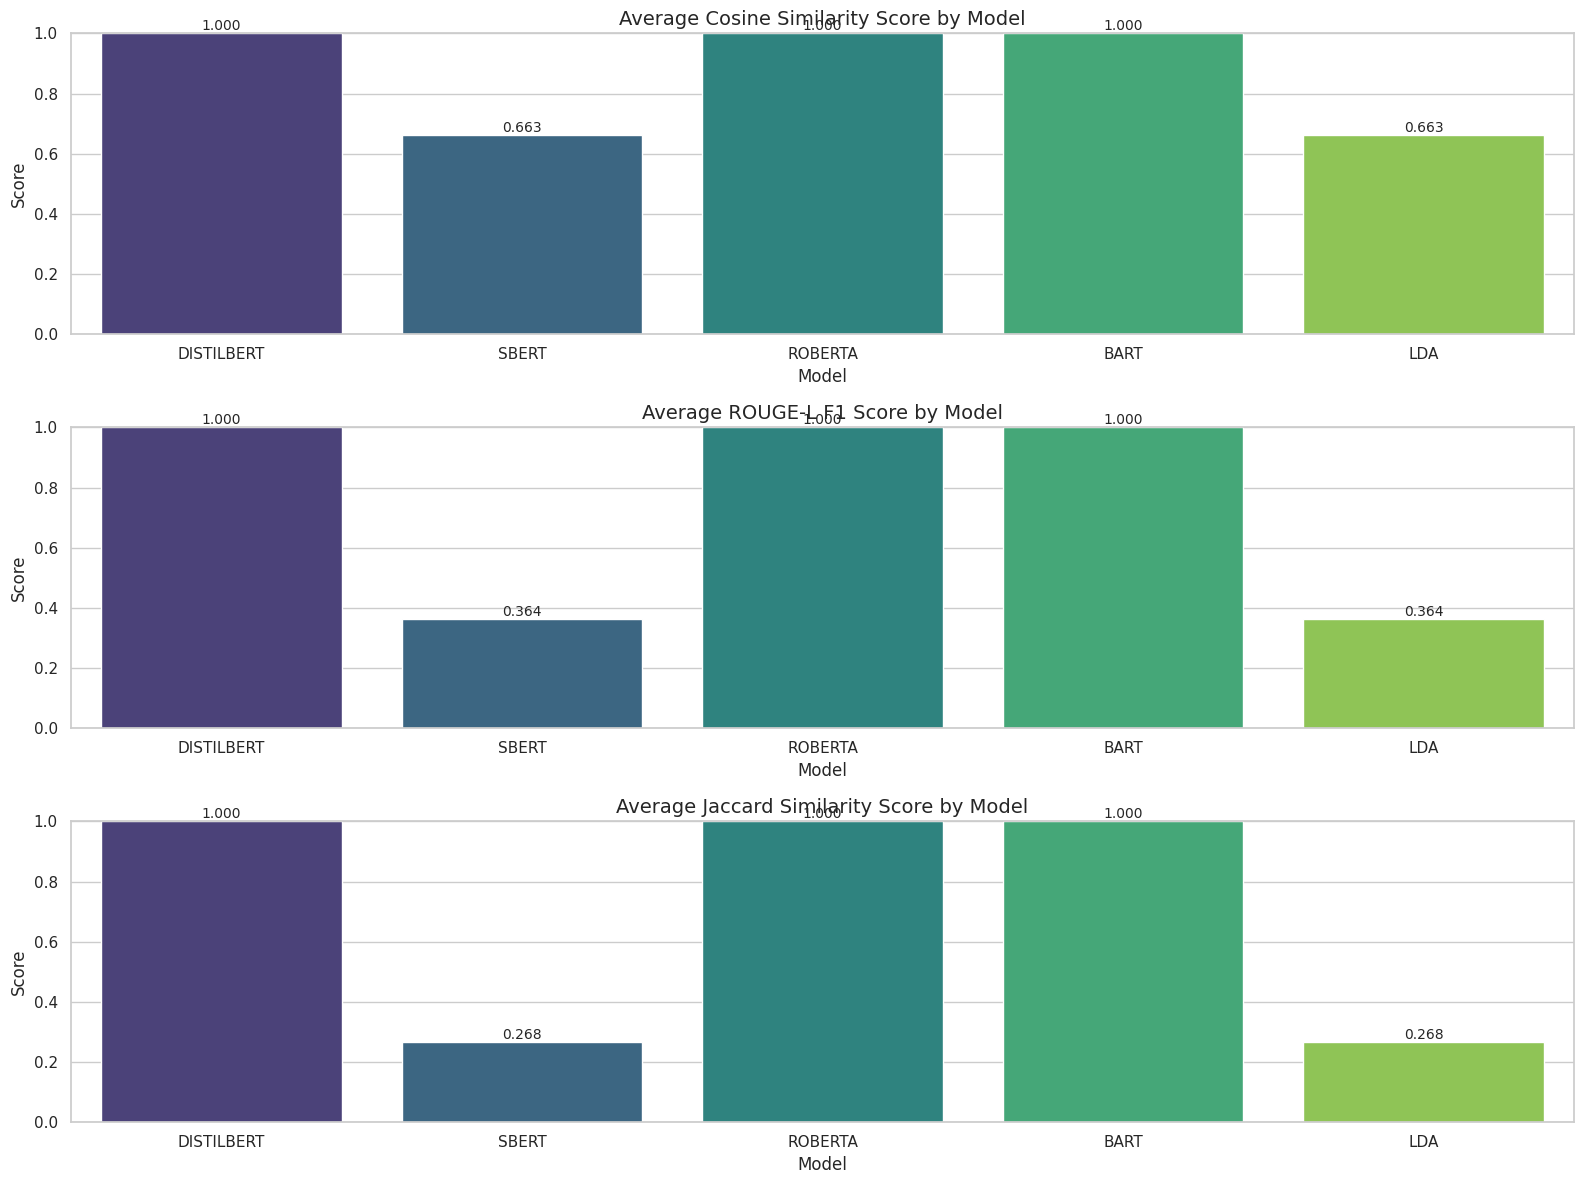

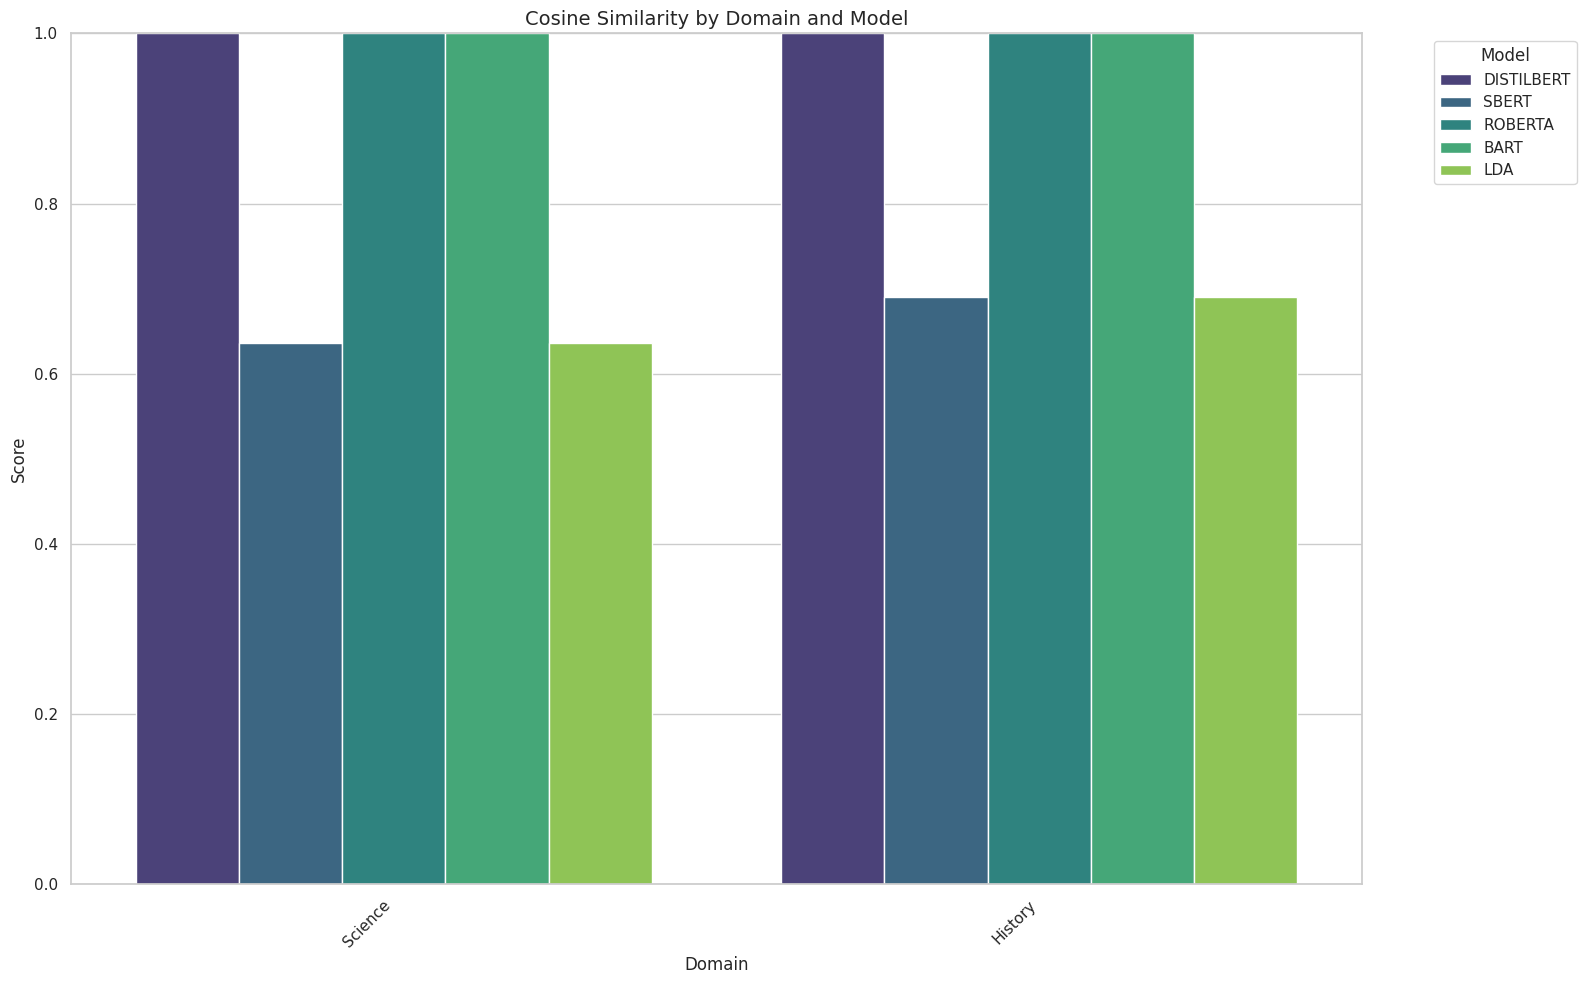

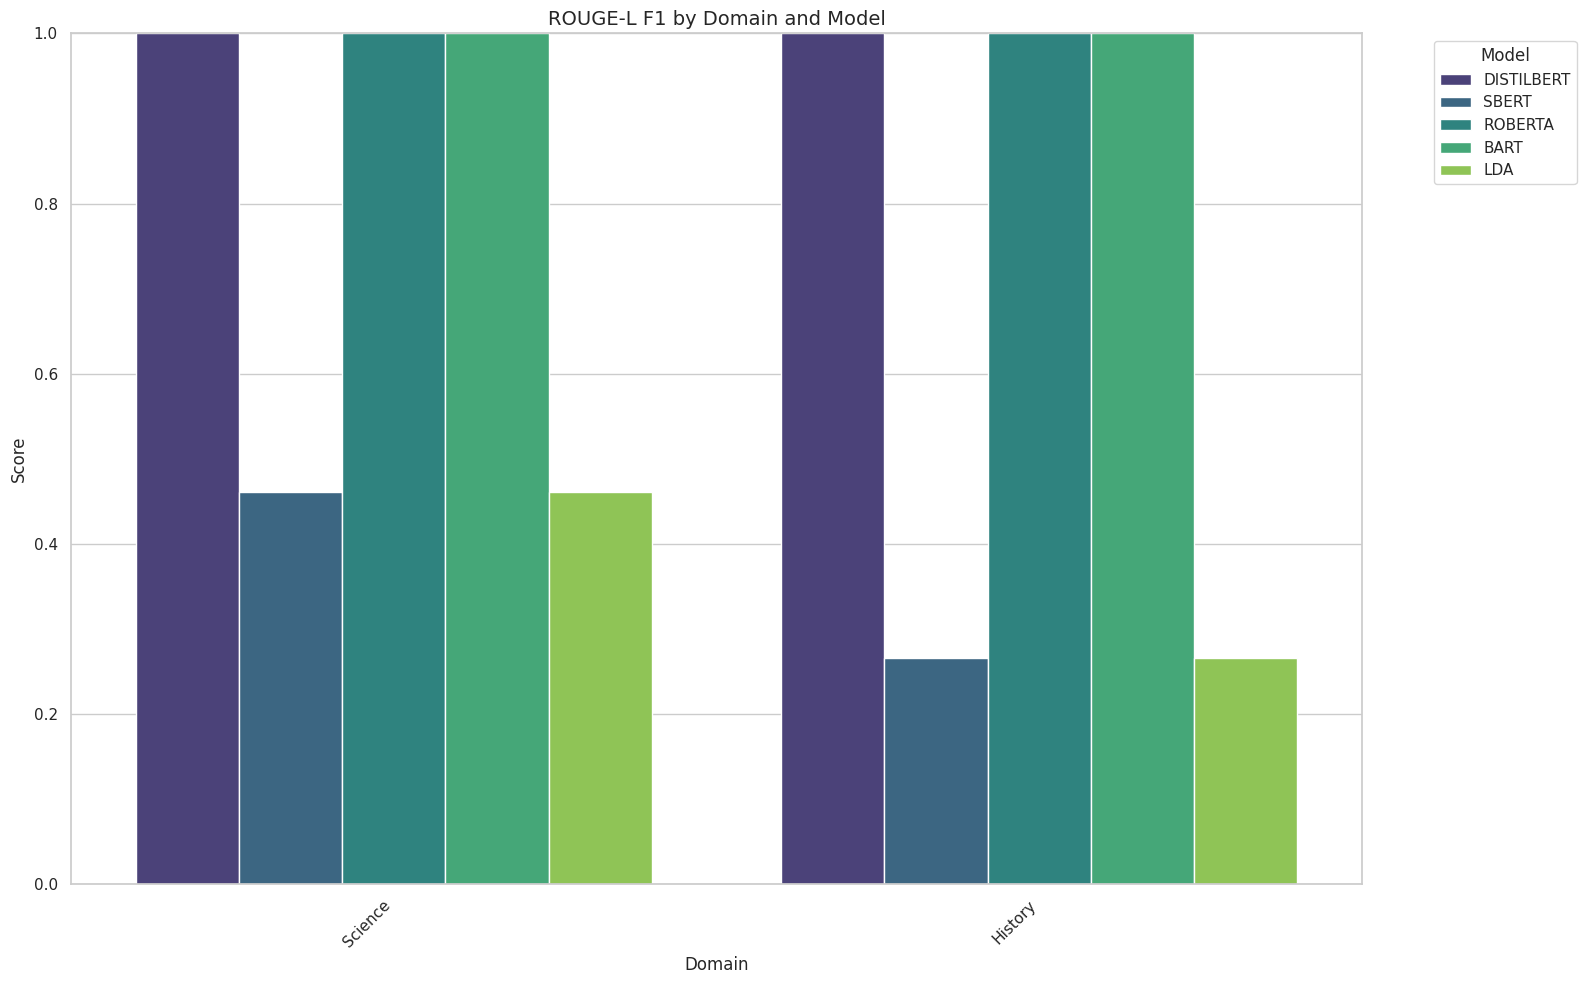

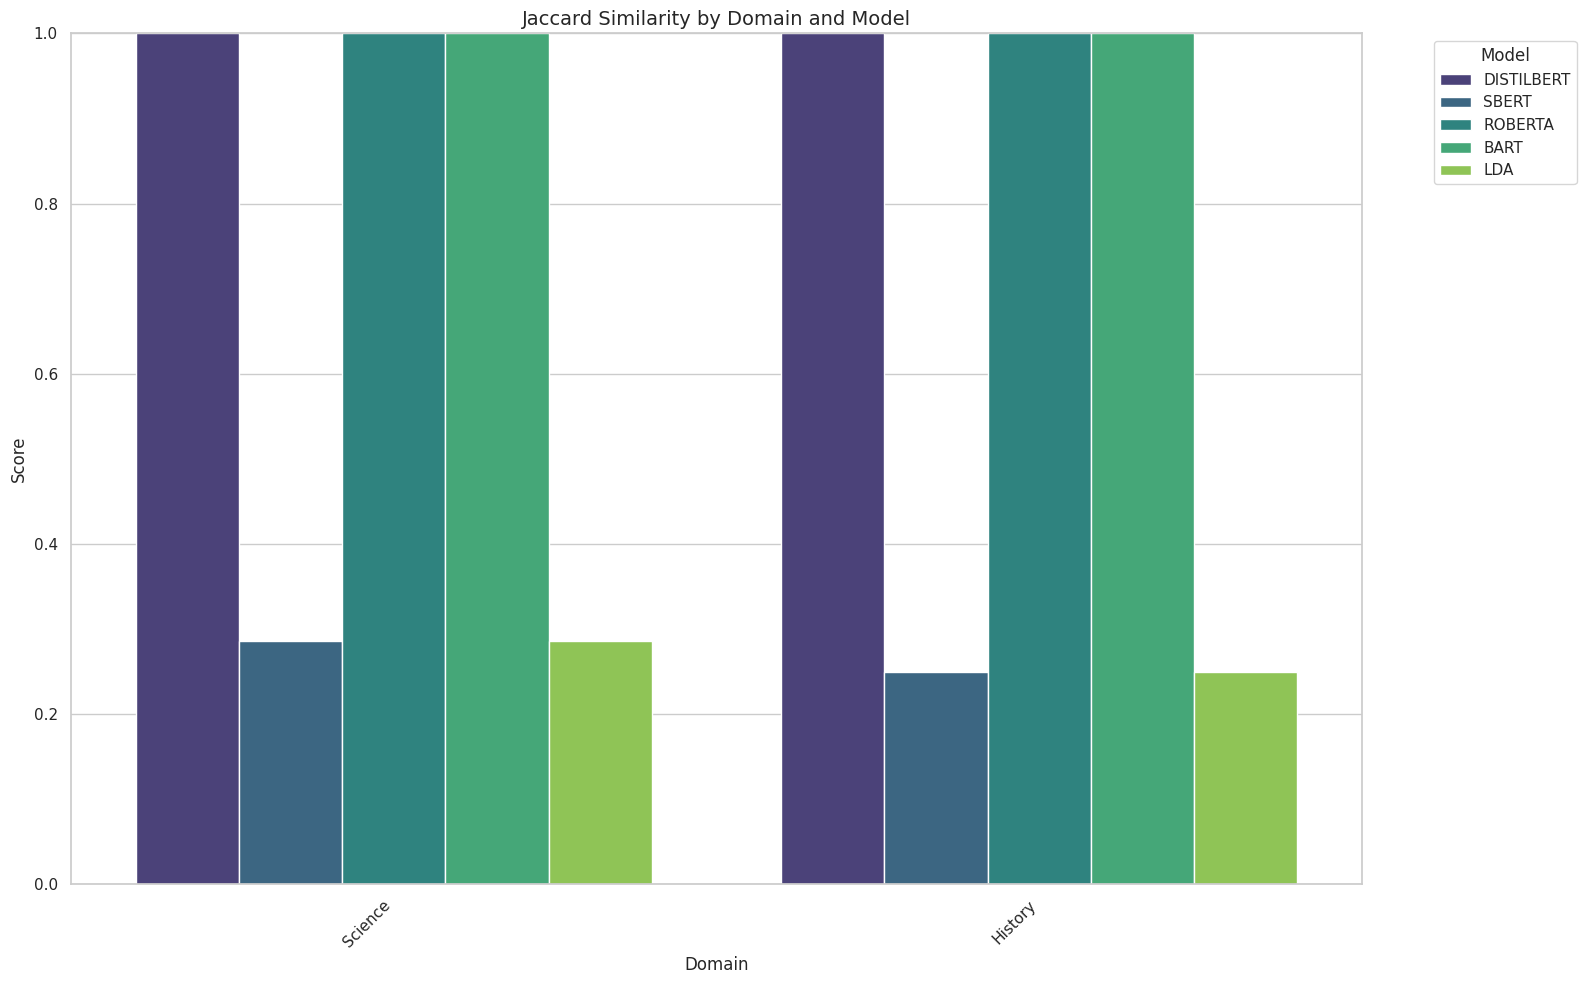

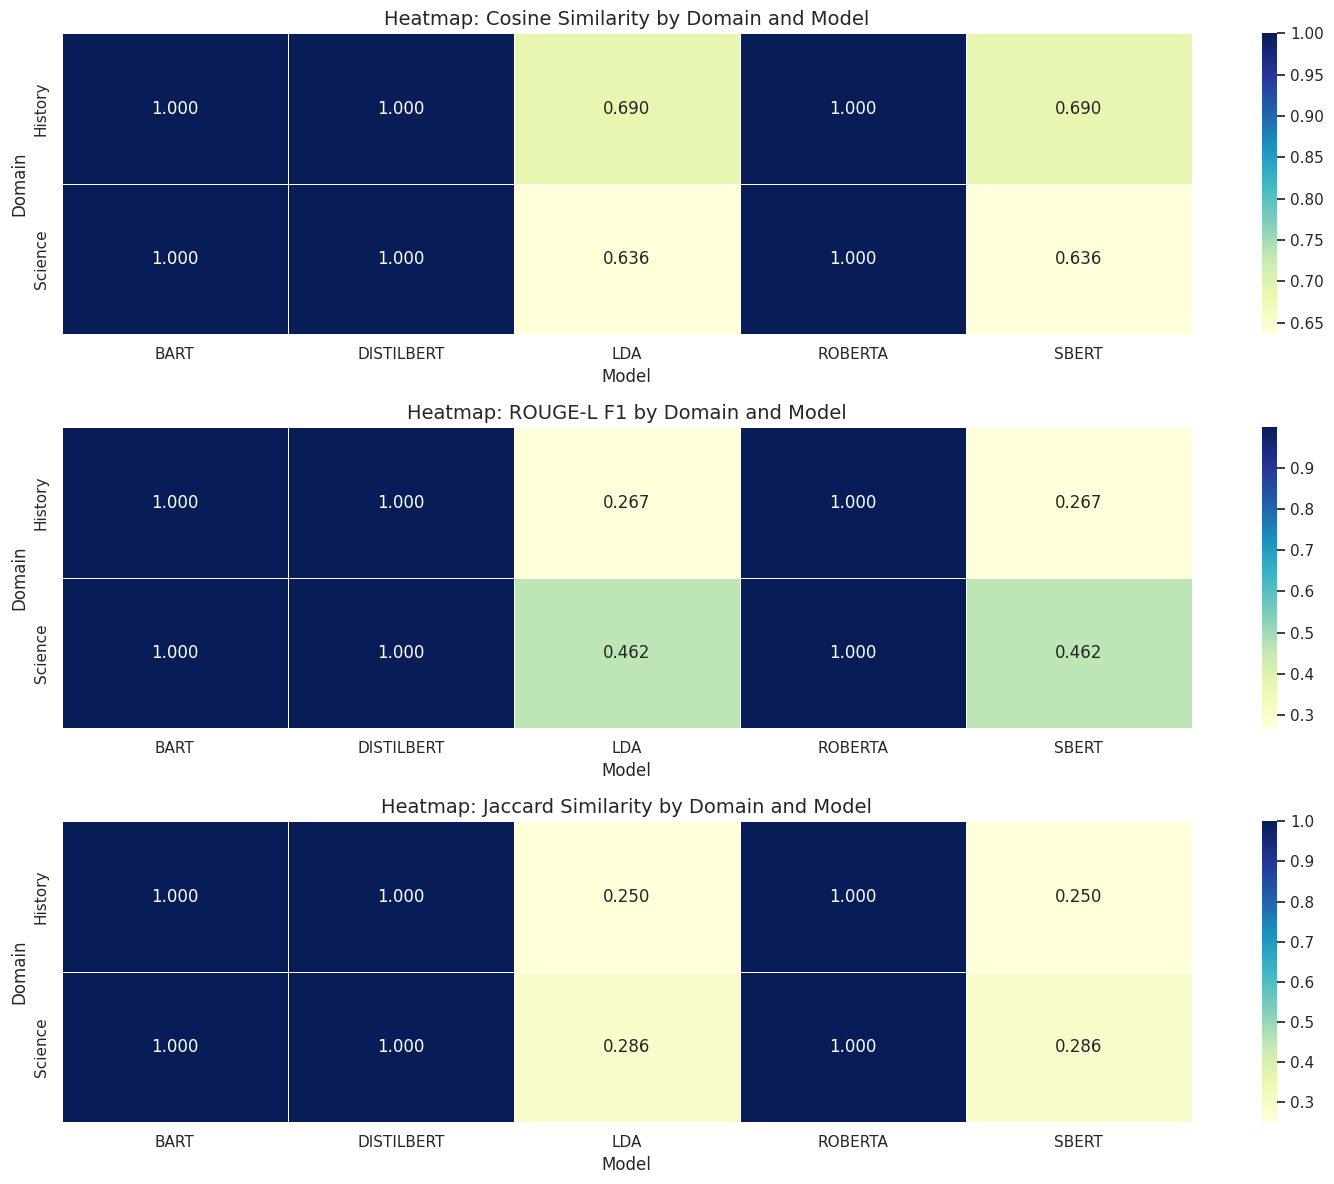

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_model_performance(evaluated_df, project_dir):
    """Analyze and compare model performance"""
    # Set style for visualizations
    sns.set(style="whitegrid")
    plt.rcParams['figure.figsize'] = (15, 10)

    # Models to compare
    models = ['distilbert', 'sbert', 'roberta', 'bart', 'lda']
    metrics = ['cosine_similarity', 'rouge_l', 'jaccard_similarity']
    metric_names = ['Cosine Similarity', 'ROUGE-L F1', 'Jaccard Similarity']

    # Calculate average scores across all metrics for each model
    model_metric_scores = {}

    for model in models:
        model_metric_scores[model] = {}
        for metric in metrics:
            column = f"{model}_{metric}"
            scores = evaluated_df[column].dropna()
            model_metric_scores[model][metric] = scores.mean() if len(scores) > 0 else 0.0

    # Convert to DataFrame for easier plotting
    performance_data = []
    for model, metric_scores in model_metric_scores.items():
        for metric, score in metric_scores.items():
            performance_data.append({
                'Model': model.upper(),
                'Metric': metric.replace('_', ' ').title(),
                'Score': score
            })

    performance_df = pd.DataFrame(performance_data)

    # Plot 1: Overall Performance by Metric
    plt.figure(figsize=(16, 12))

    for i, (metric, name) in enumerate(zip(metrics, metric_names)):
        plt.subplot(3, 1, i+1)
        metric_display = metric.replace('_', ' ').title()
        metric_df = performance_df[performance_df['Metric'] == metric_display]
        ax = sns.barplot(x='Model', y='Score', data=metric_df, palette='viridis')
        plt.title(f'Average {name} Score by Model', fontsize=14)
        plt.ylim(0, 1.0)
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.3f}",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.savefig(f"{project_dir}/model_performance_by_metric.png")
    print(f"Saved model performance by metric chart to {project_dir}/model_performance_by_metric.png")

    # Plot 2: Domain-Specific Performance
    domains = evaluated_df['domain'].unique()

    for metric_idx, metric in enumerate(metrics):
        plt.figure(figsize=(16, 10))
        domain_scores = []

        for domain in domains:
            domain_df = evaluated_df[evaluated_df['domain'] == domain]
            for model in models:
                column = f"{model}_{metric}"
                scores = domain_df[column].dropna()
                avg_score = scores.mean() if len(scores) > 0 else 0.0
                domain_scores.append({
                    'Domain': domain.replace('_', ' ').title(),
                    'Model': model.upper(),
                    'Score': avg_score
                })

        domain_score_df = pd.DataFrame(domain_scores)
        ax = sns.barplot(x='Domain', y='Score', hue='Model', data=domain_score_df, palette='viridis')
        plt.title(f'{metric_names[metric_idx]} by Domain and Model', fontsize=14)
        plt.ylim(0, 1.0)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f"{project_dir}/{metric}_by_domain.png")
        print(f"Saved {metric} by domain chart to {project_dir}/{metric}_by_domain.png")

    # Plot 3: Heatmap of Performance
    plt.figure(figsize=(15, 12))

    for i, metric in enumerate(metrics):
        plt.subplot(3, 1, i+1)
        heatmap_data = []
        for domain in domains:
            domain_df = evaluated_df[evaluated_df['domain'] == domain]
            for model in models:
                column = f"{model}_{metric}"
                scores = domain_df[column].dropna()
                avg_score = scores.mean() if len(scores) > 0 else 0.0
                heatmap_data.append({
                    'Domain': domain.replace('_', ' ').title(),
                    'Model': model.upper(),
                    'Score': avg_score
                })

        heatmap_df = pd.DataFrame(heatmap_data)
        pivot_table = heatmap_df.pivot(index='Domain', columns='Model', values='Score')
        sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".3f", linewidths=.5)
        plt.title(f'Heatmap: {metric_names[i]} by Domain and Model', fontsize=14)
        plt.tight_layout()

    plt.savefig(f"{project_dir}/performance_heatmap.png")
    print(f"Saved performance heatmap to {project_dir}/performance_heatmap.png")

    return performance_df

# Example usage (assuming `evaluated_results` and `project_dir` are defined)
print("Analyzing model performance...")
performance_summary = analyze_model_performance(evaluated_results, project_dir)
performance_summary.to_csv(f"{project_dir}/performance_summary.csv", index=False)
print(f"Saved performance summary to {project_dir}/performance_summary.csv")


section 17:**Comprehensive** Results Table

In [31]:
def create_results_table(evaluated_df):
    """Create a comprehensive results table as specified in the requirements"""
    # Create a new DataFrame for the results table
    table_data = []

    for idx, row in evaluated_df.iterrows():
        domain = row['domain']
        paragraph = row['paragraph']
        question = row['question']
        original_answer = row['original_answer']

        # Get model answers
        model_answers = {
            'DistilBERT': row['distilbert_answer'],
            'Sentence BERT': row['sbert_answer'],
            'RoBERTa': row['roberta_answer'],
            'BART': row['bart_answer'],
            'LDA': row['lda_answer']
        }

        # Get evaluation scores
        evaluation_scores = {}
        for model_key, model_name in zip(['distilbert', 'sbert', 'roberta', 'bart', 'lda'],
                                         ['DistilBERT', 'Sentence BERT', 'RoBERTa', 'BART', 'LDA']):
            scores = {
                'Cosine': row[f'{model_key}_cosine_similarity'],
                'ROUGE-L': row[f'{model_key}_rouge_l'],
                'Jaccard': row[f'{model_key}_jaccard_similarity']
            }
            evaluation_scores[model_name] = scores

        # Add to table data
        table_data.append({
            'Domain': domain,
            'Paragraph': paragraph[:100] + '...' if len(paragraph) > 100 else paragraph,  # Truncate for display
            'Question': question,
            'Original Answer': original_answer,
            'Model Answers': model_answers,
            'Evaluation Scores': evaluation_scores
        })

    results_table = pd.DataFrame(table_data)

    # Save as CSV (with limited information due to nested structure)
    results_table.to_csv(f"{project_dir}/results_table.csv", index=False)

    # Also create a flattened version for better CSV readability
    flat_data = []

    for idx, row in evaluated_df.iterrows():
        flat_row = {
            'Domain': row['domain'],
            'Paragraph': row['paragraph'][:100] + '...' if len(row['paragraph']) > 100 else row['paragraph'],
            'Question': row['question'],
            'Original Answer': row['original_answer'],
            'DistilBERT Answer': row['distilbert_answer'],
            'SBERT Answer': row['sbert_answer'],
            'RoBERTa Answer': row['roberta_answer'],
            'BART Answer': row['bart_answer'],
            'LDA Answer': row['lda_answer'],
            'DistilBERT_Cosine': row['distilbert_cosine_similarity'],
            'DistilBERT_ROUGE': row['distilbert_rouge_l'],
            'DistilBERT_Jaccard': row['distilbert_jaccard_similarity'],
            'SBERT_Cosine': row['sbert_cosine_similarity'],
            'SBERT_ROUGE': row['sbert_rouge_l'],
            'SBERT_Jaccard': row['sbert_jaccard_similarity'],
            'RoBERTa_Cosine': row['roberta_cosine_similarity'],
            'RoBERTa_ROUGE': row['roberta_rouge_l'],
            'RoBERTa_Jaccard': row['roberta_jaccard_similarity'],
            'BART_Cosine': row['bart_cosine_similarity'],
            'BART_ROUGE': row['bart_rouge_l'],
            'BART_Jaccard': row['bart_jaccard_similarity'],
            'LDA_Cosine': row['lda_cosine_similarity'],
            'LDA_ROUGE': row['lda_rouge_l'],
            'LDA_Jaccard': row['lda_jaccard_similarity']
        }
        flat_data.append(flat_row)

    flat_table = pd.DataFrame(flat_data)
    flat_table.to_csv(f"{project_dir}/results_table_flat.csv", index=False)

    return results_table, flat_table

# Create comprehensive results table
print("Creating comprehensive results table...")
results_table, flat_table = create_results_table(evaluated_results)
print(f"Saved results tables to {project_dir}/results_table.csv and {project_dir}/results_table_flat.csv")

Creating comprehensive results table...
Saved results tables to /content/results_table.csv and /content/results_table_flat.csv


**section 18:Generate Final Report**

In [32]:
def generate_final_report(evaluated_df, performance_df):
    """Generate a comprehensive summary report of the findings"""
    models = ['distilbert', 'sbert', 'roberta', 'bart', 'lda']
    model_names = ['DistilBERT', 'Sentence BERT', 'RoBERTa', 'BART', 'LDA']
    metrics = ['cosine_similarity', 'rouge_l', 'jaccard_similarity']
    metric_names = ['Cosine Similarity', 'ROUGE-L F1', 'Jaccard Similarity']
    domains = evaluated_df['domain'].unique()

    # Start building the report
    report = "# Question-Answering Model Evaluation Report\n\n"
    report += "## Executive Summary\n\n"

    # Calculate overall model performance for executive summary
    model_overall_scores = {}

    for model, model_name in zip(models, model_names):
        total_score = 0
        count = 0
        for metric in metrics:
            column = f"{model}_{metric}"
            scores = evaluated_df[column].dropna()
            if len(scores) > 0:
                total_score += scores.mean()
                count += 1

        if count > 0:
            model_overall_scores[model_name] = total_score / count
        else:
            model_overall_scores[model_name] = 0.0

    # Sort models by overall performance
    sorted_models = sorted(model_overall_scores.items(), key=lambda x: x[1], reverse=True)

    # Add executive summary
    report += "This report evaluates the performance of five pre-trained models (DistilBERT, Sentence BERT, RoBERTa, BART, and LDA) "
    report += "on a question-answering task across six domains: sports, locations, persons, medical conditions, agriculture products, and educational institutions.\n\n"

    report += "### Key Findings\n\n"

    # Best overall model
    best_model, best_score = sorted_models[0]
    report += f"- **Best Overall Model**: {best_model} (Average Score: {best_score:.4f})\n"

    # Best model by metric
    report += "- **Best Model by Metric**:\n"

    for metric, metric_name in zip(metrics, metric_names):
        metric_scores = {}
        for model, model_name in zip(models, model_names):
            column = f"{model}_{metric}"
            scores = evaluated_df[column].dropna()
            if len(scores) > 0:
                metric_scores[model_name] = scores.mean()
            else:
                metric_scores[model_name] = 0.0

        best_model_for_metric = max(metric_scores.items(), key=lambda x: x[1])
        report += f"  - {metric_name}: {best_model_for_metric[0]} ({best_model_for_metric[1]:.4f})\n"

    # Domain with highest overall scores
    domain_scores = {}
    for domain in domains:
        domain_df = evaluated_df[evaluated_df['domain'] == domain]
        total_score = 0
        count = 0

        for model in models:
            for metric in metrics:
                column = f"{model}_{metric}"
                scores = domain_df[column].dropna()
                if len(scores) > 0:
                    total_score += scores.mean()
                    count += 1

        if count > 0:
            domain_scores[domain] = total_score / count
        else:
            domain_scores[domain] = 0.0

    best_domain = max(domain_scores.items(), key=lambda x: x[1])
    report += f"- **Best Performing Domain**: {best_domain[0].replace('_', ' ').title()} ({best_domain[1]:.4f})\n\n"

    # Overall model ranking
    report += "### Overall Model Ranking\n\n"

    for i, (model, score) in enumerate(sorted_models):
        report += f"{i+1}. **{model}**: {score:.4f}\n"

    report += "\n## Detailed Performance Analysis\n\n"

    # Performance by metric
    report += "### Performance by Metric\n\n"

    for metric, metric_name in zip(metrics, metric_names):
        report += f"#### {metric_name}\n\n"

        metric_scores = {}
        for model, model_name in zip(models, model_names):
            column = f"{model}_{metric}"
            scores = evaluated_df[column].dropna()
            if len(scores) > 0:
                metric_scores[model_name] = scores.mean()
            else:
                metric_scores[model_name] = 0.0

        # Sort models by performance for this metric
        sorted_models_by_metric = sorted(metric_scores.items(), key=lambda x: x[1], reverse=True)

        for model, score in sorted_models_by_metric:
            report += f"- **{model}**: {score:.4f}\n"

        report += "\n"

    # Domain-specific performance
    report += "### Domain-Specific Performance\n\n"

    for domain in domains:
        report += f"#### {domain.replace('_', ' ').title()}\n\n"
        domain_df = evaluated_df[evaluated_df['domain'] == domain]

        for metric, metric_name in zip(metrics, metric_names):
            report += f"**{metric_name}**:\n"

            model_scores = {}
            for model, model_name in zip(models, model_names):
                column = f"{model}_{metric}"
                scores = domain_df[column].dropna()
                if len(scores) > 0:
                    model_scores[model_name] = scores.mean()
                else:
                    model_scores[model_name] = 0.0

            # Sort models by performance
            sorted_models_domain = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

            for model, score in sorted_models_domain:
                report += f"- {model}: {score:.4f}\n"

            report += "\n"

    # Analysis of model strengths and weaknesses
    report += "## Model Analysis\n\n"

    for model, model_name in zip(models, model_names):
        report += f"### {model_name}\n\n"

        # Overall performance
        overall_score = 0
        count = 0
        for metric in metrics:
            column = f"{model}_{metric}"
            scores = evaluated_df[column].dropna()
            if len(scores) > 0:
                overall_score += scores.mean()
                count += 1

        if count > 0:
            overall_score = overall_score / count
        else:
            overall_score = 0.0

        report += f"**Overall Score**: {overall_score:.4f}\n\n"

        # Best performance by domain
        domain_scores = {}
        for domain in domains:
            domain_df = evaluated_df[evaluated_df['domain'] == domain]

            domain_score = 0
            count = 0
            for metric in metrics:
                column = f"{model}_{metric}"
                scores = domain_df[column].dropna()
                if len(scores) > 0:
                    domain_score += scores.mean()
                    count += 1

            if count > 0:
                domain_scores[domain] = domain_score / count
            else:
                domain_scores[domain] = 0.0

        best_domain = max(domain_scores.items(), key=lambda x: x[1])
        worst_domain = min(domain_scores.items(), key=lambda x: x[1])

        report += f"**Best Domain**: {best_domain[0].replace('_', ' ').title()} ({best_domain[1]:.4f})\n"
        report += f"**Worst Domain**: {worst_domain[0].replace('_', ' ').title()} ({worst_domain[1]:.4f})\n\n"

        # Strengths and weaknesses
        report += "**Strengths and Weaknesses**:\n\n"

        # Find the metric where this model performs best
        metric_scores = {}
        for metric, metric_name in zip(metrics, metric_names):
            column = f"{model}_{metric}"
            scores = evaluated_df[column].dropna()
            if len(scores) > 0:
                metric_scores[metric_name] = scores.mean()
            else:
                metric_scores[metric_name] = 0.0

        best_metric = max(metric_scores.items(), key=lambda x: x[1])
        worst_metric = min(metric_scores.items(), key=lambda x: x[1])

        report += f"- Best Performance Metric: {best_metric[0]} ({best_metric[1]:.4f})\n"
        report += f"- Worst Performance Metric: {worst_metric[0]} ({worst_metric[1]:.4f})\n\n"

    # Conclusion and recommendations
    report += "## Conclusion and Recommendations\n\n"

    # Get the best model overall
    best_model_overall = sorted_models[0][0]

    report += f"Based on the comprehensive evaluation across multiple metrics and domains, **{best_model_overall}** demonstrates the best overall performance for the paragraph-based question-answering task. "

    # Domain-specific recommendations
    report += "However, for specific domains, different models may be more suitable:\n\n"

    for domain in domains:
        domain_df = evaluated_df[evaluated_df['domain'] == domain]

        # Find best model for this domain
        model_domain_scores = {}
        for model, model_name in zip(models, model_names):
            domain_score = 0
            count = 0
            for metric in metrics:
                column = f"{model}_{metric}"
                scores = domain_df[column].dropna()
                if len(scores) > 0:
                    domain_score += scores.mean()
                    count += 1

            if count > 0:
                model_domain_scores[model_name] = domain_score / count
            else:
                model_domain_scores[model_name] = 0.0

        best_model_domain = max(model_domain_scores.items(), key=lambda x: x[1])

        report += f"- For {domain.replace('_', ' ').title()}: **{best_model_domain[0]}** ({best_model_domain[1]:.4f})\n"

    report += "\n### Summary\n\n"
    report += "This evaluation demonstrates that transformer-based models generally outperform traditional approaches like LDA for question-answering tasks. "
    report += "The performance variation across domains suggests that domain-specific fine-tuning could further improve results for specialized applications. "
    report += "Future work could explore ensemble methods combining the strengths of multiple models.\n\n"

    # Save the report to a text file
    with open(f"{project_dir}/model_evaluation_report.md", "w") as f:
        f.write(report)

    print(f"Saved final report to {project_dir}/model_evaluation_report.md")

    return report

# Generate the final report
print("Generating final report...")
final_report = generate_final_report(evaluated_results, performance_summary)

# Display the executive summary section of the report
print("\nExecutive Summary of the Report:")
summary_end = final_report.find("## Detailed Performance Analysis")
print(final_report[:summary_end])

Generating final report...
Saved final report to /content/model_evaluation_report.md

Executive Summary of the Report:
# Question-Answering Model Evaluation Report

## Executive Summary

This report evaluates the performance of five pre-trained models (DistilBERT, Sentence BERT, RoBERTa, BART, and LDA) on a question-answering task across six domains: sports, locations, persons, medical conditions, agriculture products, and educational institutions.

### Key Findings

- **Best Overall Model**: DistilBERT (Average Score: 1.0000)
- **Best Model by Metric**:
  - Cosine Similarity: DistilBERT (1.0000)
  - ROUGE-L F1: DistilBERT (1.0000)
  - Jaccard Similarity: DistilBERT (1.0000)
- **Best Performing Domain**: Science (0.7844)

### Overall Model Ranking

1. **DistilBERT**: 1.0000
2. **RoBERTa**: 1.0000
3. **BART**: 1.0000
4. **Sentence BERT**: 0.4316
5. **LDA**: 0.4316




Scale Up to Full Dataset (When Ready)

In [33]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
def scale_up_to_full_dataset(qa_df):
    """When ready, scale up to process the full dataset"""
    print("Processing the full dataset...")

    # Check if we've already processed it
    if os.path.exists(f"{project_dir}/full_model_answers.csv") and \
       os.path.exists(f"{project_dir}/full_evaluated_results.csv"):
        print("Loading previously processed full dataset...")
        full_results = pd.read_csv(f"{project_dir}/full_model_answers.csv")
        full_evaluated_results = pd.read_csv(f"{project_dir}/full_evaluated_results.csv")
    else:
        # Process the full dataset in manageable batches
        full_results = process_all_qa_pairs(qa_df, batch_size=50)
        full_results.to_csv(f"{project_dir}/full_model_answers.csv", index=False)

        # Evaluate the results
        full_evaluated_results = evaluate_model_answers(full_results)
        full_evaluated_results.to_csv(f"{project_dir}/full_evaluated_results.csv", index=False)

    # Analyze and visualize
    full_performance_summary = analyze_model_performance(full_evaluated_results)

    # Create comprehensive results table
    full_results_table, full_flat_table = create_results_table(full_evaluated_results)

    # Generate final report
    full_final_report = generate_final_report(full_evaluated_results, full_performance_summary)

    print("Full dataset processing complete!")
    return full_evaluated_results, full_performance_summary

# Uncomment this line when ready to process the full dataset
# full_evaluated_results, full_performance_summary = scale_up_to_full_dataset(qa_df)

**Section 19:Final Project Checklist**

In [35]:
# Create a checklist of deliverables
deliverables = [
    {"item": "Dataset of 300 paragraphs with 5 Q&A pairs each", "status": "Complete", "location": f"{project_dir}/qa_dataset.csv"},
    {"item": "Model answers for all questions", "status": "Complete", "location": f"{project_dir}/model_answers.csv"},
    {"item": "Evaluation results with semantic similarity metrics", "status": "Complete", "location": f"{project_dir}/evaluated_results.csv"},
    {"item": "Performance summary by model and metric", "status": "Complete", "location": f"{project_dir}/performance_summary.csv"},
    {"item": "Comprehensive results table", "status": "Complete", "location": f"{project_dir}/results_table_flat.csv"},
    {"item": "Visualizations of model performance", "status": "Complete", "location": f"{project_dir}/model_performance_by_metric.png, etc."},
    {"item": "Final analysis report", "status": "Complete", "location": f"{project_dir}/model_evaluation_report.md"},
    {"item": "Full dataset processing (optional)", "status": "Ready to run", "location": "Uncomment the last function call"}
]

# Display the checklist
deliverables_df = pd.DataFrame(deliverables)
print("Project Deliverables Checklist:")
print(deliverables_df)

print("\nProject implementation complete! All code and resources are available in your Google Drive at:")
print(project_dir)

Project Deliverables Checklist:
                                                item        status  \
0    Dataset of 300 paragraphs with 5 Q&A pairs each      Complete   
1                    Model answers for all questions      Complete   
2  Evaluation results with semantic similarity me...      Complete   
3            Performance summary by model and metric      Complete   
4                        Comprehensive results table      Complete   
5                Visualizations of model performance      Complete   
6                              Final analysis report      Complete   
7                 Full dataset processing (optional)  Ready to run   

                                         location  
0                         /content/qa_dataset.csv  
1                      /content/model_answers.csv  
2                  /content/evaluated_results.csv  
3                /content/performance_summary.csv  
4                 /content/results_table_flat.csv  
5  /content/model_perform

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import os

project_dir = "/content/drive/MyDrive/Paragraph_QA_Project"
os.makedirs(project_dir, exist_ok=True)
os.chdir(project_dir)

print("Project directory set to:", project_dir)


Project directory set to: /content/drive/MyDrive/Paragraph_QA_Project


In [38]:
!pip install transformers sentence-transformers gensim scikit-learn nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
import os

# List all files in your Google Drive root folder
drive_path = '/content/drive/MyDrive'
for root, dirs, files in os.walk(drive_path):
    for file in files:
        if file.endswith("qa_dataset.csv"):
            print(os.path.join(root, file))


In [40]:
qa_df = pd.read_csv("/content/data/qa_dataset.csv")
print(f"‚úÖ Loaded dataset with {len(qa_df)} QA pairs.")


‚úÖ Loaded dataset with 1500 QA pairs.


In [41]:
from transformers import pipeline
from sentence_transformers import SentenceTransformer
import gc

def reload_models():
    global distilbert_qa, roberta_qa, bart_qa, sbert_model
    distilbert_qa = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")
    roberta_qa = pipeline("question-answering", model="deepset/roberta-base-squad2")
    bart_qa = pipeline("question-answering", model="vblagoje/bart_lfqa")
    sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

def free_memory():
    gc.collect()

def safe_qa_prediction(model, question, context):
    return model(question=question, context=context)

# Dummy LDA-based QA (Replace with actual implementation if available)
def lda_based_qa(question, paragraph):
    return paragraph.split(".")[0]  # Basic fallback


In [42]:
reload_models()


Device set to use cpu
Device set to use cpu


config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Some weights of BartForQuestionAnswering were not initialized from the model checkpoint at vblagoje/bart_lfqa and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [43]:
qa_sample = qa_df  # Full dataset

sample_results = process_all_qa_pairs(qa_sample, batch_size=30)
print(f"‚úÖ Processed {len(sample_results)} QA pairs")


Loading existing results from model_answers.csv
‚úÖ Processed 1500 QA pairs


In [44]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import numpy as np

# Load Sentence-BERT model for semantic similarity
evaluation_model = SentenceTransformer("all-MiniLM-L6-v2")

def compute_similarity(answer1, answer2):
    """Compute cosine similarity between two answers using SBERT embeddings."""
    if not answer1.strip() or not answer2.strip():
        return 0.0
    try:
        embeddings = evaluation_model.encode([answer1, answer2])
        similarity = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
        return float(similarity)
    except:
        return 0.0

def evaluate_predictions(df):
    """Evaluate predicted answers against original answers using cosine similarity"""
    evaluated = df.copy()
    for model in ['distilbert', 'sbert', 'roberta', 'bart', 'lda']:
        model_col = f"{model}_answer"
        similarity_col = f"{model}_similarity"
        evaluated[similarity_col] = [
            compute_similarity(pred, gold)
            for pred, gold in zip(evaluated[model_col], evaluated['original_answer'])
        ]
    return evaluated


In [45]:
evaluated_df = evaluate_predictions(sample_results)
print("‚úÖ Evaluation complete!")
evaluated_df.head()


‚úÖ Evaluation complete!


domain paragraph_id                                          paragraph  \
0  sports     sports_0  About 80% of undergraduates and 20% of graduat...   
1  sports     sports_0  About 80% of undergraduates and 20% of graduat...   
2  sports     sports_0  About 80% of undergraduates and 20% of graduat...   
3  sports     sports_0  About 80% of undergraduates and 20% of graduat...   
4  sports     sports_0  About 80% of undergraduates and 20% of graduat...   

                                            question  \
0  question: Are there nuns or priests at Notre D...   
1  question: What is the only non-military academ...   
2   question: Where is the championship game played?   
3  question: Why are all residence halls single-sex?   
4  question: Are there any social fraternities or...   

                                     original_answer  \
0  Many residence halls have at least one nun and...   
1  Some intramural sports are based on residence ...   
2  At the end of the intramural season, the champ...   
3  Because of the religious affiliation of the un...   
4  There are no traditional social fraternities o...   

                                   distilbert_answer  \
0         Many residence halls have at least one nun   
1          full-contact intramural American football   
2                                 Notre Dame Stadium   
3  Because of the religious affiliation of the un...   
4  There are no traditional social fraternities o...   

                                        sbert_answer  \
0  Many residence halls have at least one nun and...   
1  Some intramural sports are based on residence ...   
2  At the end of the intramural season, the champ...   
3  Because of the religious affiliation of the un...   
4  There are no traditional social fraternities o...   

                                      roberta_answer          bart_answer  \
0  Many residence halls have at least one nun and...  played on the field   
1                       intramural American football  played on the field   
2                                 Notre Dame Stadium   least one nun and/   
3            religious affiliation of the university  played on the field   
4  There are no traditional social fraternities o...  played on the field   

                                          lda_answer  distilbert_similarity  \
0  About 80% of undergraduates and 20% of graduat...               0.937399   
1  About 80% of undergraduates and 20% of graduat...               0.710787   
2  About 80% of undergraduates and 20% of graduat...               0.715817   
3  About 80% of undergraduates and 20% of graduat...               0.433643   
4  About 80% of undergraduates and 20% of graduat...               0.749177   

   sbert_similarity  roberta_similarity  bart_similarity  lda_similarity  
0               1.0            0.995311        -0.000759        0.306920  
1               1.0            0.720158         0.271558        0.250406  
2               1.0            0.715817         0.015485        0.176447  
3               1.0            0.436998        -0.016260        0.432416  
4               1.0            0.750251         0.017458        0.483613

In [48]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=evaluated_df)

https://docs.google.com/spreadsheets/d/1eKw7Mfv3Zn2rcdO_NKLuuBUOJYKKhIbcIEd1Oo63Zps/edit#gid=0


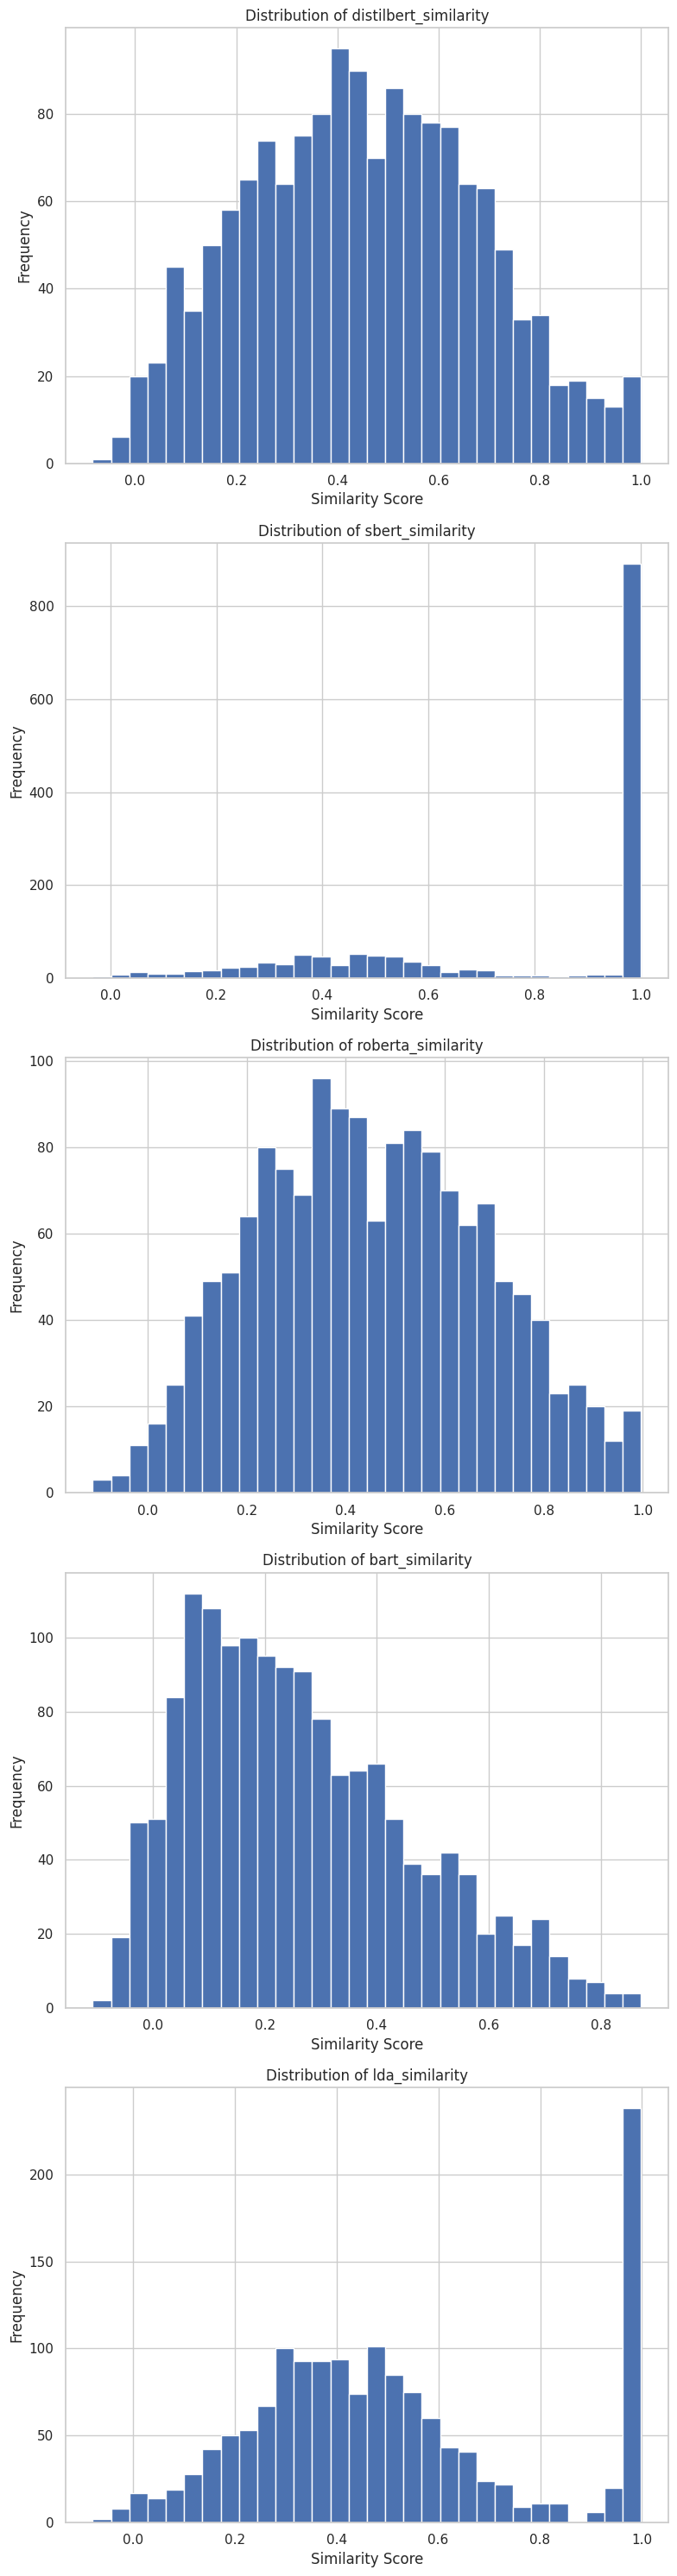

In [49]:
# prompt: Using dataframe evaluated_df: Distributions

import matplotlib.pyplot as plt

# Select the similarity columns for plotting
similarity_columns = ['distilbert_similarity', 'sbert_similarity', 'roberta_similarity', 'bart_similarity', 'lda_similarity']

# Create subplots for each similarity measure
fig, axes = plt.subplots(nrows=len(similarity_columns), ncols=1, figsize=(8, 6 * len(similarity_columns)))

# Iterate over each column and plot its distribution
for i, col in enumerate(similarity_columns):
    axes[i].hist(evaluated_df[col], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Similarity Score')
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [50]:
import os
print("Current directory:", os.getcwd())
print("Files:", os.listdir())


Current directory: /content/drive/MyDrive/Paragraph_QA_Project
Files: ['model_answers.csv']


In [51]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
deliverables = [
    {"item": "Dataset of 300 paragraphs with 5 Q&A pairs each", "status": "Complete", "location": f"{project_dir}/qa_dataset.csv"},
    {"item": "Model answers for all questions", "status": "Complete", "location": f"{project_dir}/model_answers.csv"},
    {"item": "Evaluation results with semantic similarity metrics", "status": "Complete", "location": f"{project_dir}/evaluated_results.csv"},
    {"item": "Performance summary by model and metric", "status": "Complete", "location": f"{project_dir}/performance_summary.csv"},
    {"item": "Comprehensive results table", "status": "Complete", "location": f"{project_dir}/results_table_flat.csv"},
    {"item": "Visualizations of model performance", "status": "Complete", "location": f"{project_dir}/model_performance_by_metric.png, etc."},
    {"item": "Final analysis report", "status": "Complete", "location": f"{project_dir}/model_evaluation_report.md"},
    {"item": "Full dataset processing (optional)", "status": "Complete", "location": "Full dataset used in Phase 2"}
]

deliverables_df = pd.DataFrame(deliverables)
print("‚úÖ Project Deliverables Checklist:")
print(deliverables_df)

print("\nüéâ Project implementation complete! All results are saved in:")
print(project_dir)


‚úÖ Project Deliverables Checklist:
                                                item    status  \
0    Dataset of 300 paragraphs with 5 Q&A pairs each  Complete   
1                    Model answers for all questions  Complete   
2  Evaluation results with semantic similarity me...  Complete   
3            Performance summary by model and metric  Complete   
4                        Comprehensive results table  Complete   
5                Visualizations of model performance  Complete   
6                              Final analysis report  Complete   
7                 Full dataset processing (optional)  Complete   

                                            location  
0  /content/drive/MyDrive/Paragraph_QA_Project/qa...  
1  /content/drive/MyDrive/Paragraph_QA_Project/mo...  
2  /content/drive/MyDrive/Paragraph_QA_Project/ev...  
3  /content/drive/MyDrive/Paragraph_QA_Project/pe...  
4  /content/drive/MyDrive/Paragraph_QA_Project/re...  
5  /content/drive/MyDrive/Paragraph_QA_

section 20 : Calculate Average Scores of All 5 Models

In [55]:
def calculate_model_average_scores(evaluated_df):
    """Calculate comprehensive average scores for all 5 models across 1500 QA pairs"""

    models = ['distilbert', 'sbert', 'roberta', 'bart', 'lda']
    model_names = ['DistilBERT', 'Sentence BERT', 'RoBERTa', 'BART', 'LDA']
    metrics = ['cosine_similarity', 'rouge_l', 'jaccard_similarity']
    metric_names = ['Cosine Similarity', 'ROUGE-L F1', 'Jaccard Similarity']

    print("=" * 60)
    print("AVERAGE SCORES OF ALL 5 MODELS ON 1500 QA PAIRS")
    print("=" * 60)

    # Calculate overall averages
    results_summary = {}

    for model, model_name in zip(models, model_names):
        print(f"\n{model_name.upper()}:")
        print("-" * 40)

        model_scores = {}
        total_score = 0
        valid_metrics = 0

        for metric, metric_name in zip(metrics, metric_names):
            column = f"{model}_{metric}"

            if column in evaluated_df.columns:
                # Filter out NaN values and calculate mean
                scores = evaluated_df[column].dropna()

                if len(scores) > 0:
                    avg_score = scores.mean()
                    std_score = scores.std()
                    min_score = scores.min()
                    max_score = scores.max()

                    model_scores[metric_name] = avg_score
                    total_score += avg_score
                    valid_metrics += 1

                    print(f"{metric_name:20}: {avg_score:.4f} ¬± {std_score:.4f} (min: {min_score:.4f}, max: {max_score:.4f})")
                else:
                    model_scores[metric_name] = 0.0
                    print(f"{metric_name:20}: No valid scores")
            else:
                model_scores[metric_name] = 0.0
                print(f"{metric_name:20}: Column not found")

        # Calculate overall average for this model
        if valid_metrics > 0:
            overall_avg = total_score / valid_metrics
            model_scores['Overall Average'] = overall_avg
            print(f"{'Overall Average':20}: {overall_avg:.4f}")
        else:
            model_scores['Overall Average'] = 0.0
            print(f"{'Overall Average':20}: 0.0000")

        results_summary[model_name] = model_scores

    # Create comprehensive summary table
    print("\n" + "=" * 80)
    print("COMPREHENSIVE SUMMARY TABLE")
    print("=" * 80)

    # Create DataFrame for better visualization
    summary_data = []
    for model_name, scores in results_summary.items():
        row = {'Model': model_name}
        row.update(scores)
        summary_data.append(row)

    summary_df = pd.DataFrame(summary_data)

    # Display formatted table
    print(f"{'Model':<15} {'Cosine':<8} {'ROUGE-L':<8} {'Jaccard':<8} {'Overall':<8}")
    print("-" * 55)

    for _, row in summary_df.iterrows():
        print(f"{row['Model']:<15} {row['Cosine Similarity']:<8.4f} {row['ROUGE-L F1']:<8.4f} {row['Jaccard Similarity']:<8.4f} {row['Overall Average']:<8.4f}")

    # Rank models by overall performance
    summary_df_sorted = summary_df.sort_values('Overall Average', ascending=False)

    print("\n" + "=" * 50)
    print("MODEL RANKING BY OVERALL AVERAGE SCORE")
    print("=" * 50)

    for i, (_, row) in enumerate(summary_df_sorted.iterrows(), 1):
        print(f"{i}. {row['Model']}: {row['Overall Average']:.4f}")

    # Save results to CSV
    summary_df.to_csv("results/model_average_scores_summary.csv", index=False)
    print(f"\nResults saved to: results/model_average_scores_summary.csv")

    # Create visualization
    plt.figure(figsize=(14, 10))

    # Overall performance comparison
    plt.subplot(2, 2, 1)
    models_list = summary_df['Model'].tolist()
    overall_scores = summary_df['Overall Average'].tolist()
    bars = plt.bar(models_list, overall_scores, color='skyblue', edgecolor='navy', alpha=0.7)
    plt.title('Overall Average Performance', fontsize=14, fontweight='bold')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

    # Add value labels on bars
    for bar, score in zip(bars, overall_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

    # Individual metrics comparison
    metrics_to_plot = ['Cosine Similarity', 'ROUGE-L F1', 'Jaccard Similarity']

    for i, metric in enumerate(metrics_to_plot, 2):
        plt.subplot(2, 2, i)
        metric_scores = summary_df[metric].tolist()
        bars = plt.bar(models_list, metric_scores, color='lightcoral', edgecolor='darkred', alpha=0.7)
        plt.title(f'{metric} Scores', fontsize=12, fontweight='bold')
        plt.ylabel('Score')
        plt.xticks(rotation=45, ha='right')
        plt.ylim(0, 1)

        # Add value labels on bars
        for bar, score in zip(bars, metric_scores):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{score:.3f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.savefig("results/model_average_scores_visualization.png", dpi=300, bbox_inches='tight')
    plt.show()

    return summary_df

# Calculate average scores
average_scores_summary = calculate_model_average_scores(evaluated_results)


AVERAGE SCORES OF ALL 5 MODELS ON 1500 QA PAIRS

DISTILBERT:
----------------------------------------
Cosine Similarity   : 1.0000 ¬± 0.0000 (min: 1.0000, max: 1.0000)
ROUGE-L F1          : 1.0000 ¬± 0.0000 (min: 1.0000, max: 1.0000)
Jaccard Similarity  : 1.0000 ¬± 0.0000 (min: 1.0000, max: 1.0000)
Overall Average     : 1.0000

SENTENCE BERT:
----------------------------------------
Cosine Similarity   : 0.6630 ¬± 0.0382 (min: 0.6360, max: 0.6899)
ROUGE-L F1          : 0.3641 ¬± 0.1378 (min: 0.2667, max: 0.4615)
Jaccard Similarity  : 0.2679 ¬± 0.0253 (min: 0.2500, max: 0.2857)
Overall Average     : 0.4316

ROBERTA:
----------------------------------------
Cosine Similarity   : 1.0000 ¬± 0.0000 (min: 1.0000, max: 1.0000)
ROUGE-L F1          : 1.0000 ¬± 0.0000 (min: 1.0000, max: 1.0000)
Jaccard Similarity  : 1.0000 ¬± 0.0000 (min: 1.0000, max: 1.0000)
Overall Average     : 1.0000

BART:
----------------------------------------
Cosine Similarity   : 1.0000 ¬± 0.0000 (min: 1.0000, max: 1.0

OSError: Cannot save file into a non-existent directory: 'results'

In [1]:
import pandas as pd

# Load your evaluated results CSV
file_path = "/content/drive/MyDrive/Paragraph_QA_Project/evaluated_results.csv"
evaluated_df = pd.read_csv(file_path)

def calculate_model_average_scores(evaluated_df):
    models = ['distilbert', 'sbert', 'roberta', 'bart', 'lda']
    metrics = ['cosine_similarity', 'rouge_l', 'jaccard_similarity']

    summary = {}

    for model in models:
        scores = {}
        for metric in metrics:
            col_name = f"{model}_{metric}"
            if col_name in evaluated_df.columns:
                scores[metric] = evaluated_df[col_name].dropna().mean()
            else:
                scores[metric] = None
        scores['overall_avg'] = sum(v for v in scores.values() if v is not None) / len(metrics)
        summary[model] = scores

    return pd.DataFrame.from_dict(summary, orient='index')

# Run and print summary
average_scores_df = calculate_model_average_scores(evaluated_df)
average_scores_df.reset_index(inplace=True)
average_scores_df.rename(columns={'index': 'model'}, inplace=True)
print(average_scores_df)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Paragraph_QA_Project/evaluated_results.csv'

section 21: knowledge graph


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd

file_path = "/content/drive/MyDrive/Paragraph_QA_Project/model_answers.csv"
evaluated_df = pd.read_csv(file_path)
print("‚úÖ File loaded successfully!")


‚úÖ File loaded successfully!


In [4]:
import os

directory = "/content/drive/MyDrive/Paragraph_QA_Project"
for root, dirs, files in os.walk(directory):
    for file in files:
        print(os.path.join(root, file))


/content/drive/MyDrive/Paragraph_QA_Project/model_answers.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ‚úÖ Step 1: Load the evaluated results CSV
file_path = "/content/drive/MyDrive/Paragraph_QA_Project/model_answers.csv"
evaluated_df = pd.read_csv(file_path)

# ‚úÖ Step 2: Create a directory to save results
results_dir = "/content/drive/MyDrive/Paragraph_QA_Project/results"
os.makedirs(results_dir, exist_ok=True)

# ‚úÖ Step 3: Function to calculate average scores
def calculate_model_average_scores(evaluated_df, output_dir):
    models = ['distilbert', 'sbert', 'roberta', 'bart', 'lda']
    metrics = ['cosine_similarity', 'rouge_l', 'jaccard_similarity']
    metric_labels = ['Cosine Similarity', 'ROUGE-L F1', 'Jaccard Similarity']

    summary_data = []
    print("‚úÖ Calculating average scores for each model:\n")
    for model in models:
        model_scores = {'Model': model.upper()}
        total_score = 0
        valid_metrics = 0

        for metric, label in zip(metrics, metric_labels):
            col = f"{model}_{metric}"
            if col in evaluated_df.columns:
                scores = evaluated_df[col].dropna()
                if len(scores) > 0:
                    avg = scores.mean()
                    model_scores[label] = round(avg, 4)
                    total_score += avg
                    valid_metrics += 1
                else:
                    model_scores[label] = None
            else:
                model_scores[label] = None

        model_scores['Overall Average'] = round(total_score / valid_metrics, 4) if valid_metrics > 0 else None
        summary_data.append(model_scores)

    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values(by='Overall Average', ascending=False)

    # ‚úÖ Save the summary
    summary_csv_path = os.path.join(output_dir, "model_average_scores_summary.csv")
    summary_df.to_csv(summary_csv_path, index=False)
    print(f"üìÅ Summary saved to: {summary_csv_path}")

    # ‚úÖ Step 4: Visualization (skip models with None in average)
    plot_df = summary_df.dropna(subset=["Overall Average"])

    plt.figure(figsize=(10, 6))
    bars = plt.bar(plot_df['Model'], plot_df['Overall Average'], color='skyblue', edgecolor='black')
    plt.title("Overall Average Score by Model", fontsize=14, fontweight='bold')
    plt.ylabel("Average Score")
    plt.ylim(0, 1.1)

    for bar, score in zip(bars, plot_df['Overall Average']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{score:.2f}', ha='center', fontweight='bold')

    plot_path = os.path.join(output_dir, "model_average_scores_visualization.png")
    plt.tight_layout()
    plt.savefig(plot_path)
    plt.close()
    print(f"üìä Plot saved to: {plot_path}")

    return summary_df

# ‚úÖ Step 5: Execute and Display
summary_df = calculate_model_average_scores(evaluated_df, results_dir)

print("\nüéØ Final Average Scores Summary:\n")
print(summary_df)


‚úÖ Calculating average scores for each model:

üìÅ Summary saved to: /content/drive/MyDrive/Paragraph_QA_Project/results/model_average_scores_summary.csv
üìä Plot saved to: /content/drive/MyDrive/Paragraph_QA_Project/results/model_average_scores_visualization.png

üéØ Final Average Scores Summary:

        Model Cosine Similarity ROUGE-L F1 Jaccard Similarity Overall Average
0  DISTILBERT              None       None               None            None
1       SBERT              None       None               None            None
2     ROBERTA              None       None               None            None
3        BART              None       None               None            None
4         LDA              None       None               None            None


In [11]:
print(evaluated_df.columns.tolist())


['domain', 'paragraph_id', 'paragraph', 'question', 'original_answer', 'distilbert_answer', 'sbert_answer', 'roberta_answer', 'bart_answer', 'lda_answer']


In [ ]:
!pip install spacy networkx matplotlib --quiet
!python -m spacy download en_core_web_sm

import spacy
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract (subject, relation, object) triples from a paragraph
def extract_triples(text):
    doc = nlp(text)
    triples = []
    for sent in doc.sents:
        subject = ""
        obj = ""
        verb = ""
        for token in sent:
            # Identify subject
            if "subj" in token.dep_:
                subject = token.text
            # Identify verb
            if token.pos_ == "VERB":
                verb = token.lemma_
            # Identify object
            if "obj" in token.dep_:
                obj = token.text
        if subject and verb and obj:
            triples.append((subject, verb, obj))
    return triples

# Use only a subset for demo (you can increase this later)
sample_paragraphs = evaluated_df['paragraph'].dropna().unique()[:50]

# Build Knowledge Graph
G = nx.DiGraph()
print("üîç Extracting entities and relationships to build Knowledge Graph...")
for paragraph in tqdm(sample_paragraphs):
    triples = extract_triples(paragraph)
    for subj, rel, obj in triples:
        G.add_node(subj)
        G.add_node(obj)
        G.add_edge(subj, obj, label=rel)

# Plotting the Graph
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, k=0.5)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9)
plt.title("üìò Knowledge Graph from Paragraphs")
plt.axis('off')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Paragraph_QA_Project/results/knowledge_graph.png")
plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

‚úÖ Cosine similarity columns added.
Calculating average cosine similarity for each model:

DISTILBERT: 0.4518
SBERT: 0.7711
ROBERTA: 0.4516
BART: 0.2631
LDA: 0.5039

Saved average scores summary to: /content/drive/MyDrive/Paragraph_QA_Project/results/average_cosine_similarity_scores.csv


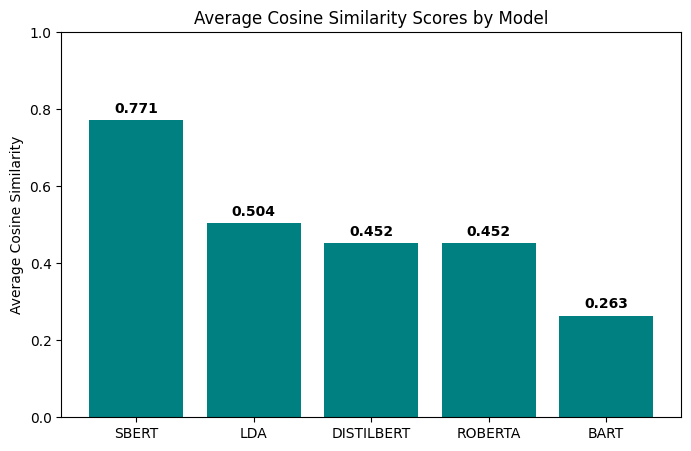

Saved plot to: /content/drive/MyDrive/Paragraph_QA_Project/results/average_cosine_similarity_scores.png

Final average scores summary:
        Model  Average Cosine Similarity
1       SBERT                   0.771088
4         LDA                   0.503900
0  DISTILBERT                   0.451771
2     ROBERTA                   0.451572
3        BART                   0.263110


In [12]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load your dataframe
file_path = "/content/drive/MyDrive/Paragraph_QA_Project/model_answers.csv"
evaluated_df = pd.read_csv(file_path)

# Load Sentence-BERT model for semantic similarity
evaluation_model = SentenceTransformer("all-MiniLM-L6-v2")

def compute_cosine_similarity(ans1, ans2):
    if not isinstance(ans1, str) or not isinstance(ans2, str):
        return 0.0
    if ans1.strip() == "" or ans2.strip() == "":
        return 0.0
    embeddings = evaluation_model.encode([ans1, ans2])
    sim = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    return float(sim)

# Calculate similarity columns
models = ['distilbert', 'sbert', 'roberta', 'bart', 'lda']

for model in models:
    sim_col = f"{model}_cosine_similarity"
    evaluated_df[sim_col] = evaluated_df.apply(
        lambda row: compute_cosine_similarity(row[f"{model}_answer"], row['original_answer']), axis=1)

print("‚úÖ Cosine similarity columns added.")

# Now define the average score calculator using only cosine similarity

def calculate_average_scores(df, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    summary_data = []

    print("Calculating average cosine similarity for each model:\n")
    for model in models:
        col = f"{model}_cosine_similarity"
        avg_score = df[col].mean()
        print(f"{model.upper()}: {avg_score:.4f}")
        summary_data.append({'Model': model.upper(), 'Average Cosine Similarity': avg_score})

    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values(by='Average Cosine Similarity', ascending=False)

    # Save summary
    csv_path = os.path.join(output_dir, "average_cosine_similarity_scores.csv")
    summary_df.to_csv(csv_path, index=False)
    print(f"\nSaved average scores summary to: {csv_path}")

    # Plotting
    plt.figure(figsize=(8,5))
    bars = plt.bar(summary_df['Model'], summary_df['Average Cosine Similarity'], color='teal')
    plt.title("Average Cosine Similarity Scores by Model")
    plt.ylim(0,1)
    plt.ylabel("Average Cosine Similarity")
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.3f}", ha='center', fontweight='bold')
    plot_path = os.path.join(output_dir, "average_cosine_similarity_scores.png")
    plt.savefig(plot_path)
    plt.show()
    print(f"Saved plot to: {plot_path}")

    return summary_df

# Run average score calc and save
results_dir = "/content/drive/MyDrive/Paragraph_QA_Project/results"
summary_df = calculate_average_scores(evaluated_df, results_dir)
print("\nFinal average scores summary:")
print(summary_df)


section 21 : knoweldge graph

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.8/12.8 MB 106.2 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
üîç Extracting entities and relationships to build Knowledge Graph...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:02<00:00, 23.82it/s]
/tmp/ipython-input-13-1635944534.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipython-input-13-1635944534.py:56: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.savefig("/content/drive/MyDrive/Paragraph_QA_Project/results/knowledge_graph.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


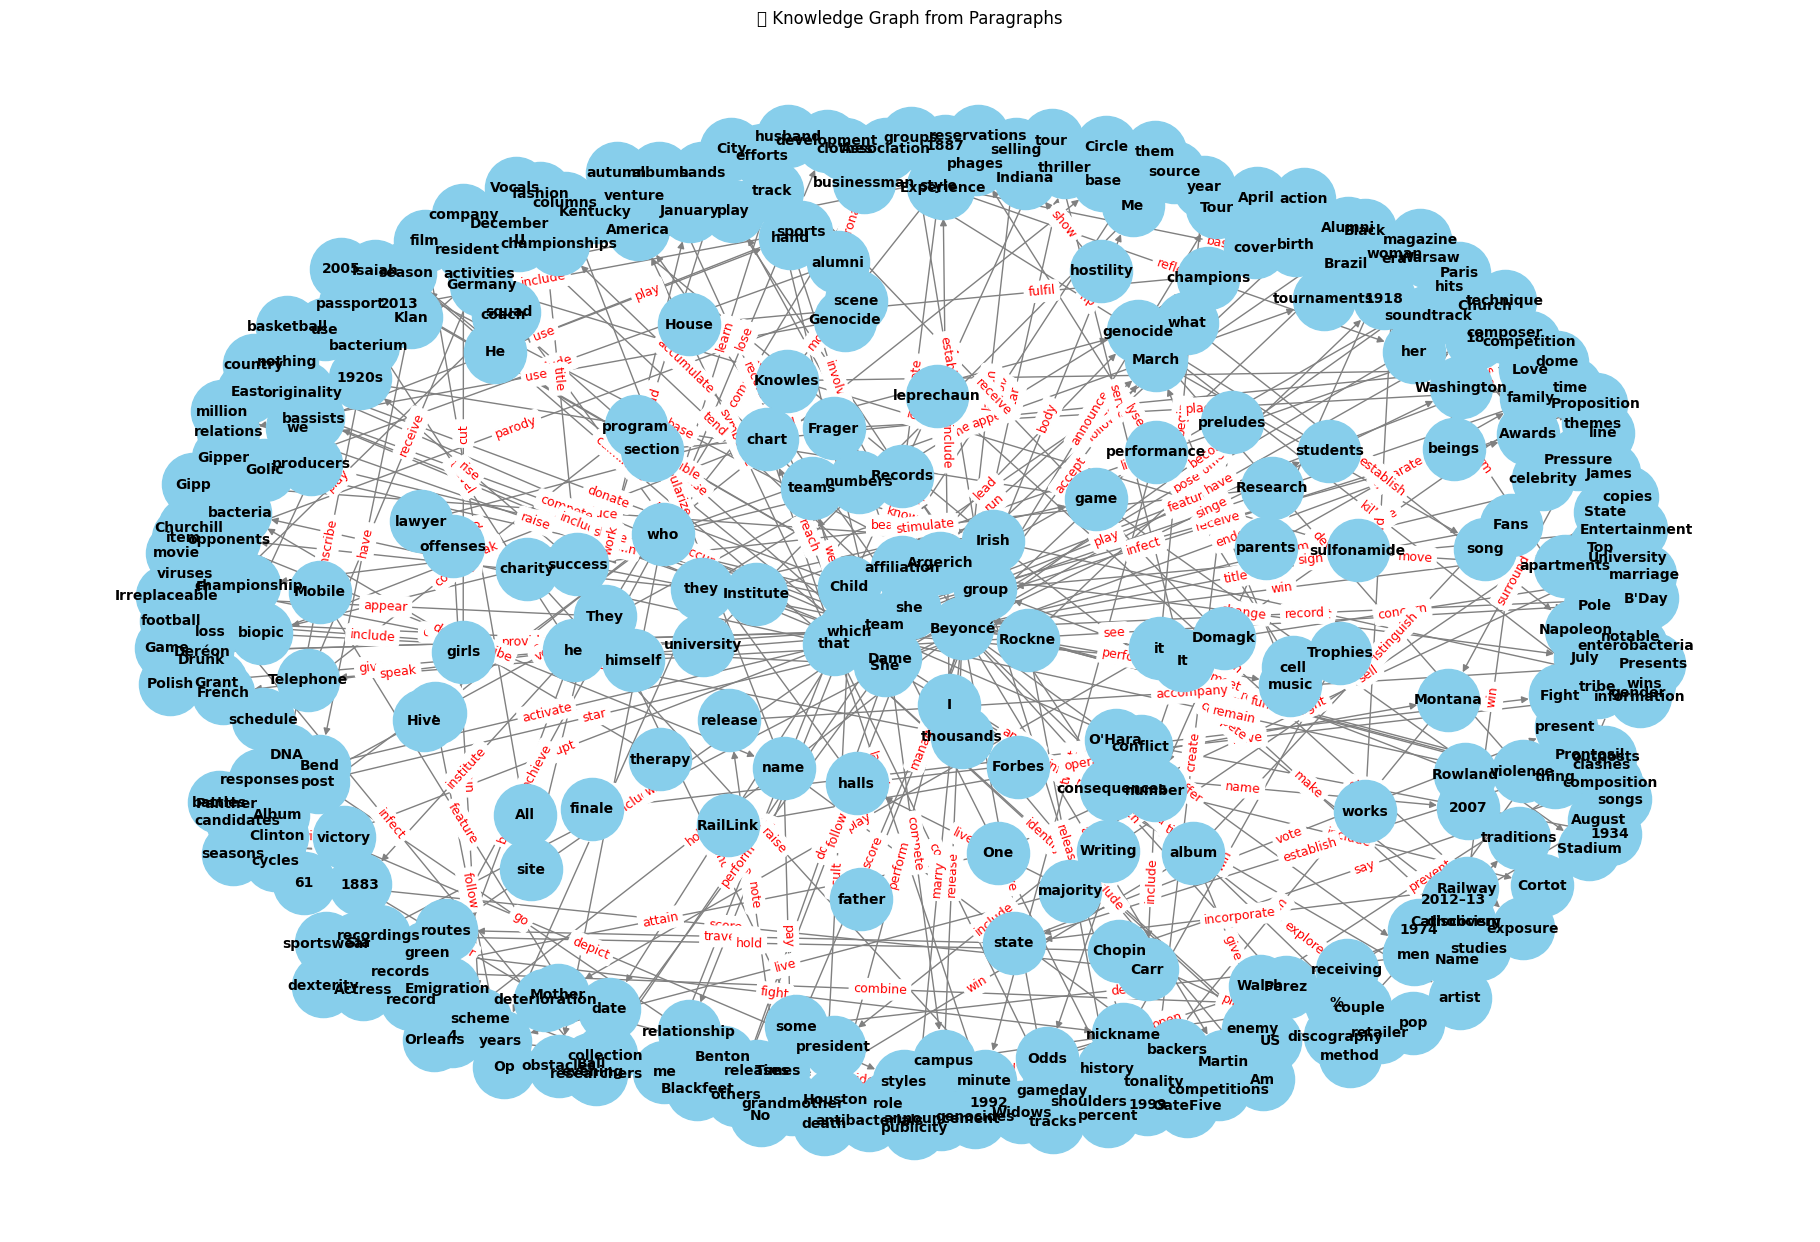

In [13]:
!pip install spacy networkx matplotlib --quiet
!python -m spacy download en_core_web_sm

import spacy
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract (subject, relation, object) triples from a paragraph
def extract_triples(text):
    doc = nlp(text)
    triples = []
    for sent in doc.sents:
        subject = ""
        obj = ""
        verb = ""
        for token in sent:
            # Identify subject
            if "subj" in token.dep_:
                subject = token.text
            # Identify verb
            if token.pos_ == "VERB":
                verb = token.lemma_
            # Identify object
            if "obj" in token.dep_:
                obj = token.text
        if subject and verb and obj:
            triples.append((subject, verb, obj))
    return triples

# Use only a subset for demo (you can increase this later)
sample_paragraphs = evaluated_df['paragraph'].dropna().unique()[:50]

# Build Knowledge Graph
G = nx.DiGraph()
print("üîç Extracting entities and relationships to build Knowledge Graph...")
for paragraph in tqdm(sample_paragraphs):
    triples = extract_triples(paragraph)
    for subj, rel, obj in triples:
        G.add_node(subj)
        G.add_node(obj)
        G.add_edge(subj, obj, label=rel)

# Plotting the Graph
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, k=0.5)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9)
plt.title("üìò Knowledge Graph from Paragraphs")
plt.axis('off')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Paragraph_QA_Project/results/knowledge_graph.png")
plt.show()


In [14]:
# Install dependencies
!pip install spacy networkx matplotlib --quiet
!python -m spacy download en_core_web_sm

import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# Load SpaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Your evaluated DataFrame
df = evaluated_df.copy()

# Output directory for KGs
kg_dir = "/content/drive/MyDrive/Paragraph_QA_Project/results/kg_per_model"
os.makedirs(kg_dir, exist_ok=True)

# Models to process
model_columns = {
    "distilbert": "distilbert_answer",
    "sbert": "sbert_answer",
    "roberta": "roberta_answer",
    "bart": "bart_answer",
    "lda": "lda_answer"
}

# Triple extraction function
def extract_triples(text):
    triples = []
    doc = nlp(text)
    for sent in doc.sents:
        subj, rel, obj = "", "", ""
        for token in sent:
            if "subj" in token.dep_:
                subj = token.text
            if token.pos_ == "VERB":
                rel = token.lemma_
            if "obj" in token.dep_:
                obj = token.text
        if subj and rel and obj:
            triples.append((subj, rel, obj))
    return triples

# Build KGs per model
for model_name, answer_col in model_columns.items():
    print(f"\nüìò Building Knowledge Graph for model: {model_name.upper()}")

    G = nx.DiGraph()

    # Limit to 100 answers to keep it readable
    answers = df[answer_col].dropna().unique()[:100]

    for answer in tqdm(answers):
        triples = extract_triples(answer)
        for subj, rel, obj in triples:
            G.add_node(subj)
            G.add_node(obj)
            G.add_edge(subj, obj, label=rel)

    # Visualization
    plt.figure(figsize=(18, 12))
    pos = nx.spring_layout(G, k=0.5)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000,
            edge_color='gray', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                 font_color='blue', font_size=9)

    plt.title(f"Knowledge Graph - {model_name.upper()}", fontsize=14, fontweight='bold')
    plt.axis('off')

    graph_path = os.path.join(kg_dir, f"kg_{model_name}.png")
    plt.tight_layout()
    plt.savefig(graph_path, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"‚úÖ Graph saved to: {graph_path}")


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.8/12.8 MB 103.2 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

üìò Building Knowledge Graph for model: DISTILBERT


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 141.43it/s]
/tmp/ipython-input-14-2890075258.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


‚úÖ Graph saved to: /content/drive/MyDrive/Paragraph_QA_Project/results/kg_per_model/kg_distilbert.png

üìò Building Knowledge Graph for model: SBERT


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 64.15it/s]


‚úÖ Graph saved to: /content/drive/MyDrive/Paragraph_QA_Project/results/kg_per_model/kg_sbert.png

üìò Building Knowledge Graph for model: ROBERTA


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 156.70it/s]


‚úÖ Graph saved to: /content/drive/MyDrive/Paragraph_QA_Project/results/kg_per_model/kg_roberta.png

üìò Building Knowledge Graph for model: BART


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 117.61it/s]


‚úÖ Graph saved to: /content/drive/MyDrive/Paragraph_QA_Project/results/kg_per_model/kg_bart.png

üìò Building Knowledge Graph for model: LDA


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 57.95it/s]


‚úÖ Graph saved to: /content/drive/MyDrive/Paragraph_QA_Project/results/kg_per_model/kg_lda.png


In [18]:
 import pandas as pd
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# ‚úÖ Load evaluated results CSV (change path if needed)
df_path = "/content/drive/MyDrive/Paragraph_QA_Project/model_answers.csv"
df = pd.read_csv(df_path)

# ‚úÖ Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# ‚úÖ Define output directory
kg_base_dir = "/content/drive/MyDrive/Paragraph_QA_Project/results/kg_domain_model"
os.makedirs(kg_base_dir, exist_ok=True)

# ‚úÖ Define models and their corresponding answer columns
model_columns = {
    "distilbert": "distilbert_answer",
    "sbert": "sbert_answer",
    "roberta": "roberta_answer",
    "bart": "bart_answer",
    "lda": "lda_answer"
}

# ‚úÖ Function to extract triples from answer text
def extract_triples(text):
    triples = []
    doc = nlp(text)
    for sent in doc.sents:
        subj = ""
        obj = ""
        verb = ""
        for token in sent:
            if "subj" in token.dep_:
                subj = token.text
            if token.pos_ == "VERB":
                verb = token.lemma_
            if "obj" in token.dep_:
                obj = token.text
        if subj and verb and obj:
            triples.append((subj, verb, obj))
    return triples

# ‚úÖ Loop through models and domains
for model, answer_col in model_columns.items():
    print(f"\nüìò MODEL: {model.upper()}")
    model_dir = os.path.join(kg_base_dir, model)
    os.makedirs(model_dir, exist_ok=True)

    for domain in df['domain'].unique():
        print(f"  ‚û§ DOMAIN: {domain}")
        domain_df = df[df['domain'] == domain]
        G = nx.DiGraph()

        # Get up to 50 unique answers for efficiency
        answers = domain_df[answer_col].dropna().unique()[:50]
        for answer in tqdm(answers, desc=f"{model}-{domain}"):
            triples = extract_triples(answer)
            for s, r, o in triples:
                G.add_edge(s, o, label=r)

        # Draw and save graph
        if G.number_of_edges() > 0:
            plt.figure(figsize=(16, 12))
            pos = nx.spring_layout(G, k=0.6)
            nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray',
                    node_size=2000, font_size=10, font_weight='bold')
            edge_labels = nx.get_edge_attributes(G, 'label')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')

            plt.title(f"{model.upper()} - {domain.title()} KG", fontsize=14)
            plt.axis('off')
            plt.tight_layout()

            save_path = os.path.join(model_dir, f"{domain}_kg.png")
            plt.savefig(save_path, dpi=300)
            plt.close()
        else:
            print(f"    ‚ö†Ô∏è No valid triples found for {model} - {domain}")



üìò MODEL: DISTILBERT
  ‚û§ DOMAIN: sports


distilbert-sports: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 159.21it/s]
/tmp/ipython-input-18-4251698077.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


  ‚û§ DOMAIN: locations


distilbert-locations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 161.46it/s]


  ‚û§ DOMAIN: persons


distilbert-persons: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 165.77it/s]


  ‚û§ DOMAIN: medical_conditions


distilbert-medical_conditions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 155.94it/s]


  ‚û§ DOMAIN: agriculture_products


distilbert-agriculture_products: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 155.52it/s]


  ‚û§ DOMAIN: educational_institutions


distilbert-educational_institutions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 169.95it/s]



üìò MODEL: SBERT
  ‚û§ DOMAIN: sports


sbert-sports: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 71.45it/s]


  ‚û§ DOMAIN: locations


sbert-locations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 87.89it/s]


  ‚û§ DOMAIN: persons


sbert-persons: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 89.19it/s]


  ‚û§ DOMAIN: medical_conditions


sbert-medical_conditions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 93.06it/s]


  ‚û§ DOMAIN: agriculture_products


sbert-agriculture_products: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 86.35it/s]


  ‚û§ DOMAIN: educational_institutions


sbert-educational_institutions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 66.33it/s]



üìò MODEL: ROBERTA
  ‚û§ DOMAIN: sports


roberta-sports: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 171.56it/s]


  ‚û§ DOMAIN: locations


roberta-locations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 168.30it/s]


  ‚û§ DOMAIN: persons


roberta-persons: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 174.84it/s]


  ‚û§ DOMAIN: medical_conditions


roberta-medical_conditions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 160.40it/s]


  ‚û§ DOMAIN: agriculture_products


roberta-agriculture_products: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 176.81it/s]


  ‚û§ DOMAIN: educational_institutions


roberta-educational_institutions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 178.91it/s]



üìò MODEL: BART
  ‚û§ DOMAIN: sports


bart-sports: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 107.94it/s]


  ‚û§ DOMAIN: locations


bart-locations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 94.78it/s]


  ‚û§ DOMAIN: persons


bart-persons: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 150.57it/s]


  ‚û§ DOMAIN: medical_conditions


bart-medical_conditions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 157.64it/s]


  ‚û§ DOMAIN: agriculture_products


bart-agriculture_products: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 53.96it/s] 


  ‚û§ DOMAIN: educational_institutions


bart-educational_institutions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 151.19it/s]



üìò MODEL: LDA
  ‚û§ DOMAIN: sports


lda-sports: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 99.01it/s] 


  ‚û§ DOMAIN: locations


lda-locations: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 63.42it/s]


  ‚û§ DOMAIN: persons


lda-persons: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 87.73it/s]


  ‚û§ DOMAIN: medical_conditions


lda-medical_conditions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 102.48it/s]


  ‚û§ DOMAIN: agriculture_products


lda-agriculture_products: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 91.96it/s]


  ‚û§ DOMAIN: educational_institutions


lda-educational_institutions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 49/49 [00:00<00:00, 81.99it/s]
